In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
df=pd.read_csv('/content/Airline_Data (1)')

In [427]:
df.shape

(35890, 12)

In [428]:
df.columns

Index(['Fetch Date', 'Flight Number', 'Airline', 'Origin', 'Destination',
       'Departure Date', 'Departure Time', 'Arrival Time', 'Flight Duration',
       'Seat Class', 'Total Price', 'Aircraft Type'],
      dtype='object')

In [429]:
df.head()

Fetch Date Flight Number Airline Origin Destination  \
0  2025-04-05 06:44:11        AI2993      AI    DEL         BOM   
1  2025-04-05 06:44:11        AI2420      AI    DEL         BOM   
2  2025-04-05 06:44:11        AI2112      AI    DEL         BOM   
3  2025-04-05 06:44:11        AI2933      AI    DEL         BOM   
4  2025-04-05 06:44:11        AI2957      AI    DEL         BOM   

  Departure Date       Departure Time         Arrival Time Flight Duration  \
0     2025-04-05  2025-04-05T12:35:00  2025-04-05T14:50:00           2h15m   
1     2025-04-05  2025-04-05T14:55:00  2025-04-05T17:15:00           2h20m   
2     2025-04-05  2025-04-05T14:10:00  2025-04-05T16:35:00           2h25m   
3     2025-04-05  2025-04-05T15:20:00  2025-04-05T17:45:00           2h25m   
4     2025-04-05  2025-04-05T20:30:00  2025-04-05T22:55:00           2h25m   

  Seat Class  Total Price Aircraft Type  
0    ECONOMY       5144.0           32N  
1    ECONOMY       5144.0           32N  
2    ECONOMY       5144.0           32N  
3    ECONOMY       5144.0           321  
4    ECONOMY       5144.0           32N

In [430]:
df['Aircraft Type'].unique()

array(['32N', '321', '788', '77W', '737', '77L', '320', '359', '32A'],
      dtype=object)

In [431]:
df.drop(columns=['Aircraft Type'],inplace=True)

In [432]:
df.head()

Fetch Date Flight Number Airline Origin Destination  \
0  2025-04-05 06:44:11        AI2993      AI    DEL         BOM   
1  2025-04-05 06:44:11        AI2420      AI    DEL         BOM   
2  2025-04-05 06:44:11        AI2112      AI    DEL         BOM   
3  2025-04-05 06:44:11        AI2933      AI    DEL         BOM   
4  2025-04-05 06:44:11        AI2957      AI    DEL         BOM   

  Departure Date       Departure Time         Arrival Time Flight Duration  \
0     2025-04-05  2025-04-05T12:35:00  2025-04-05T14:50:00           2h15m   
1     2025-04-05  2025-04-05T14:55:00  2025-04-05T17:15:00           2h20m   
2     2025-04-05  2025-04-05T14:10:00  2025-04-05T16:35:00           2h25m   
3     2025-04-05  2025-04-05T15:20:00  2025-04-05T17:45:00           2h25m   
4     2025-04-05  2025-04-05T20:30:00  2025-04-05T22:55:00           2h25m   

  Seat Class  Total Price  
0    ECONOMY       5144.0  
1    ECONOMY       5144.0  
2    ECONOMY       5144.0  
3    ECONOMY       5144.0  
4    ECONOMY       5144.0

In [433]:
# Convert dates to datetime
df['Fetch Date'] = pd.to_datetime(df['Fetch Date'])
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

In [434]:
# Convert Departure and Arrival Time to proper datetime format
df['Departure Time'] = pd.to_datetime(df['Departure Time']).dt.hour + pd.to_datetime(df['Departure Time']).dt.minute / 60
df['Arrival Time'] = pd.to_datetime(df['Arrival Time']).dt.hour + pd.to_datetime(df['Arrival Time']).dt.minute / 60


In [435]:
# Compute days until departure
df['days_until_departure'] = (df['Departure Date'] - df['Fetch Date']).dt.days

In [436]:
# Convert Flight Duration to numerical minutes
duration_df = df['Flight Duration'].str.extract(r'(?:(\d+)h)?(?:\s*(\d+)m)?')

# Fill missing values with 0 and convert to integers
duration_df = duration_df.fillna(0).astype(int)

# Compute total duration in minutes
df['Flight Duration'] = duration_df[0] * 60 + duration_df[1]


In [437]:
df.head()

Fetch Date Flight Number Airline Origin Destination Departure Date  \
0 2025-04-05 06:44:11        AI2993      AI    DEL         BOM     2025-04-05   
1 2025-04-05 06:44:11        AI2420      AI    DEL         BOM     2025-04-05   
2 2025-04-05 06:44:11        AI2112      AI    DEL         BOM     2025-04-05   
3 2025-04-05 06:44:11        AI2933      AI    DEL         BOM     2025-04-05   
4 2025-04-05 06:44:11        AI2957      AI    DEL         BOM     2025-04-05   

   Departure Time  Arrival Time  Flight Duration Seat Class  Total Price  \
0       12.583333     14.833333              135    ECONOMY       5144.0   
1       14.916667     17.250000              140    ECONOMY       5144.0   
2       14.166667     16.583333              145    ECONOMY       5144.0   
3       15.333333     17.750000              145    ECONOMY       5144.0   
4       20.500000     22.916667              145    ECONOMY       5144.0   

   days_until_departure  
0                    -1  
1                    -1  
2                    -1  
3                    -1  
4                    -1

In [438]:
df.loc[df['days_until_departure'] < 0, 'days_until_departure'] = 0

In [439]:
df.head()

Fetch Date Flight Number Airline Origin Destination Departure Date  \
0 2025-04-05 06:44:11        AI2993      AI    DEL         BOM     2025-04-05   
1 2025-04-05 06:44:11        AI2420      AI    DEL         BOM     2025-04-05   
2 2025-04-05 06:44:11        AI2112      AI    DEL         BOM     2025-04-05   
3 2025-04-05 06:44:11        AI2933      AI    DEL         BOM     2025-04-05   
4 2025-04-05 06:44:11        AI2957      AI    DEL         BOM     2025-04-05   

   Departure Time  Arrival Time  Flight Duration Seat Class  Total Price  \
0       12.583333     14.833333              135    ECONOMY       5144.0   
1       14.916667     17.250000              140    ECONOMY       5144.0   
2       14.166667     16.583333              145    ECONOMY       5144.0   
3       15.333333     17.750000              145    ECONOMY       5144.0   
4       20.500000     22.916667              145    ECONOMY       5144.0   

   days_until_departure  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

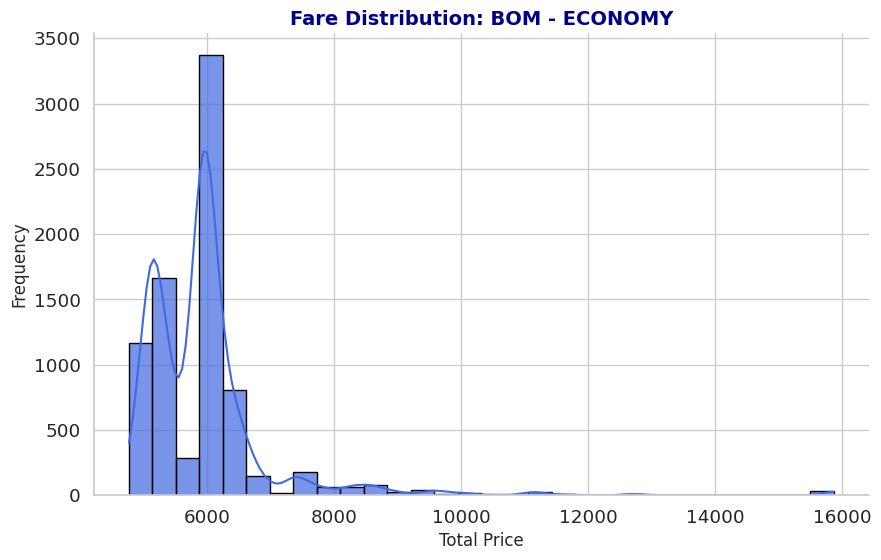

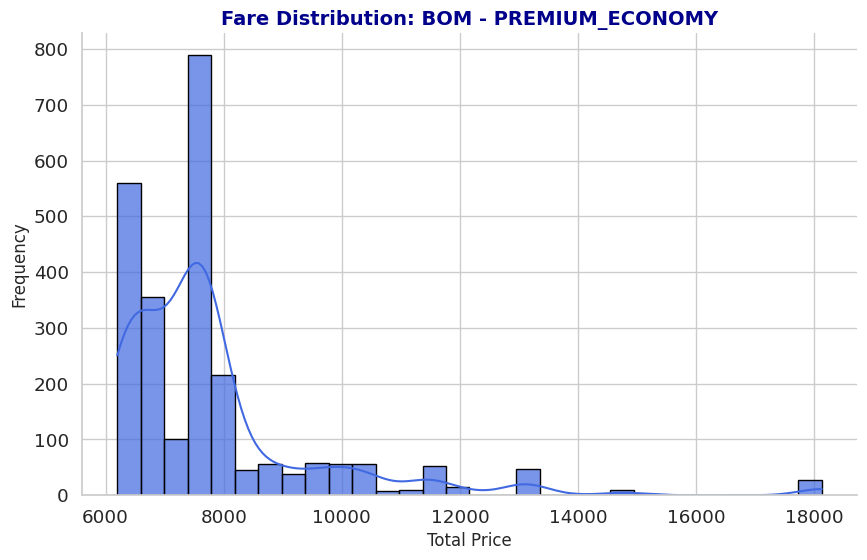

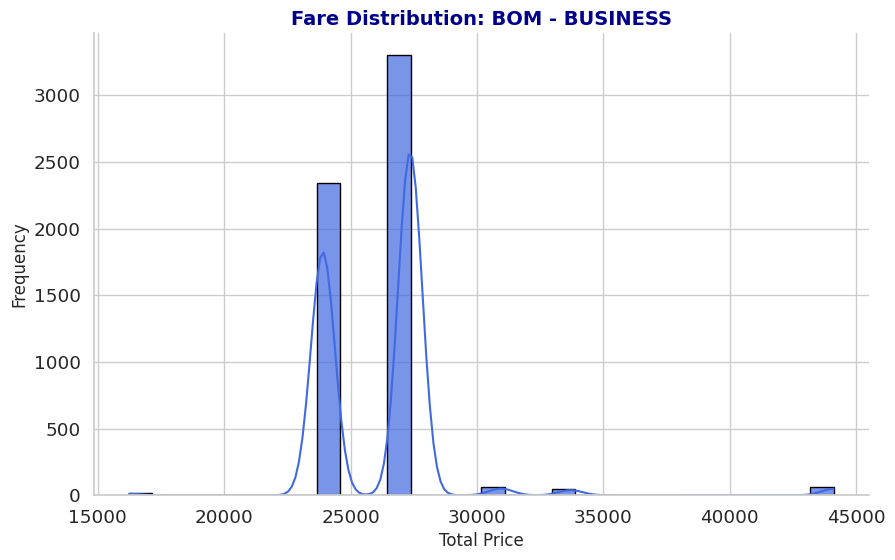

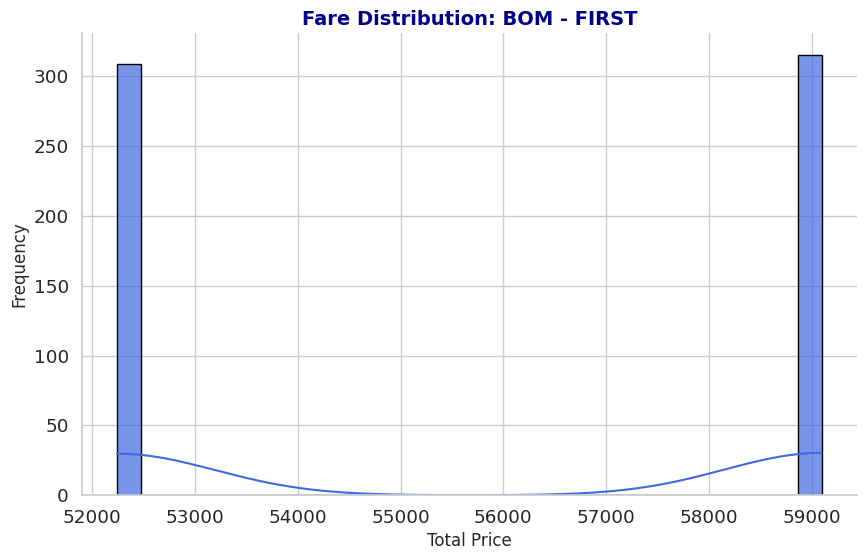

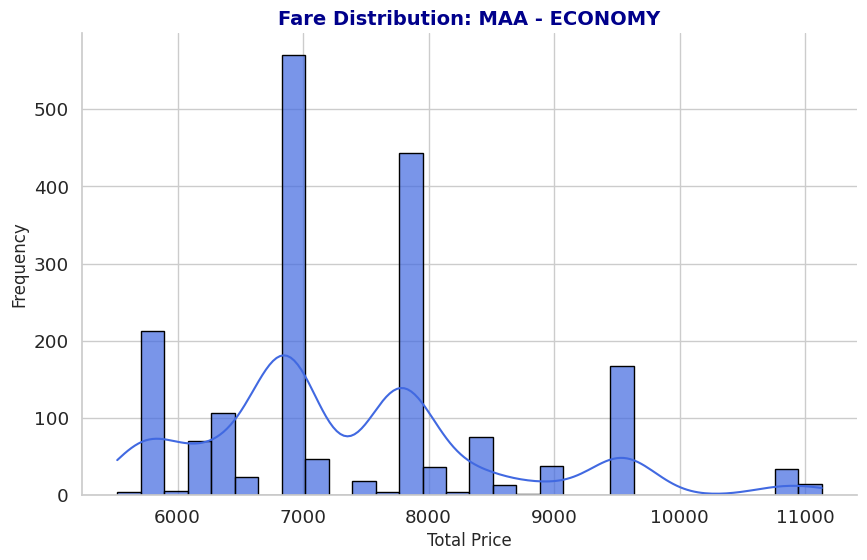

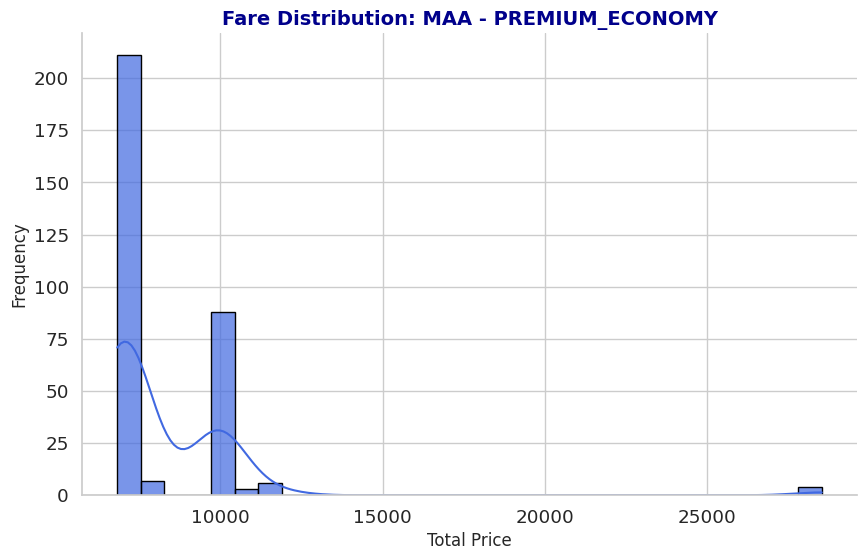

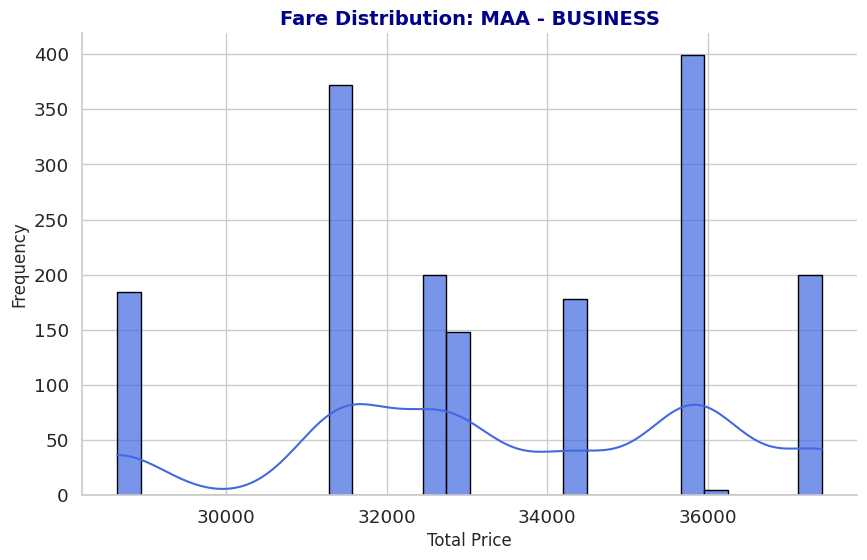

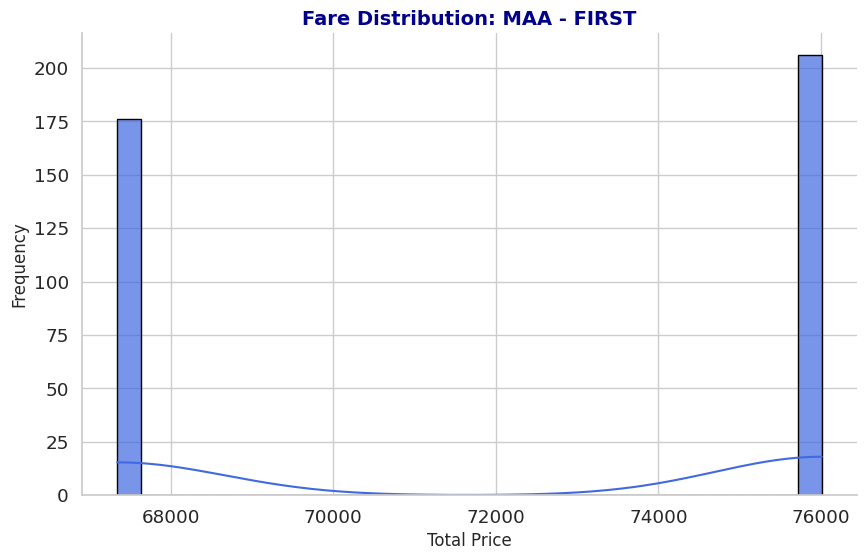

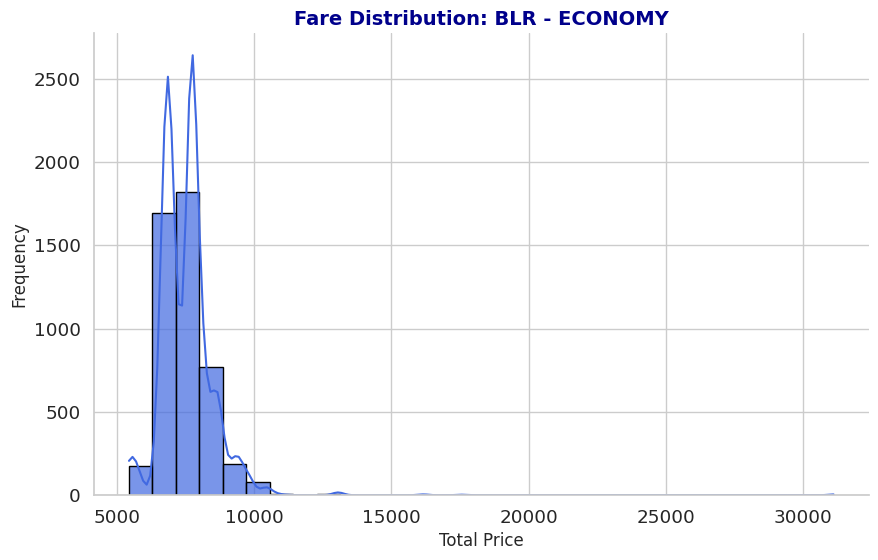

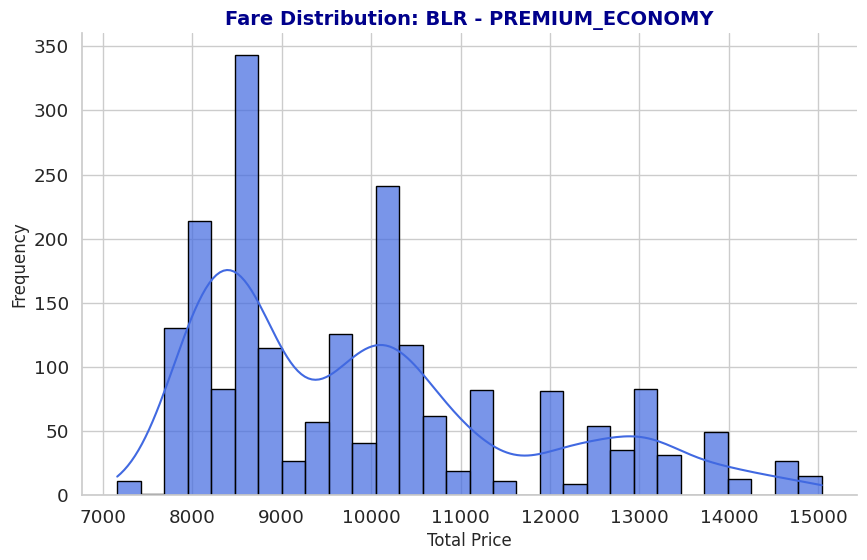

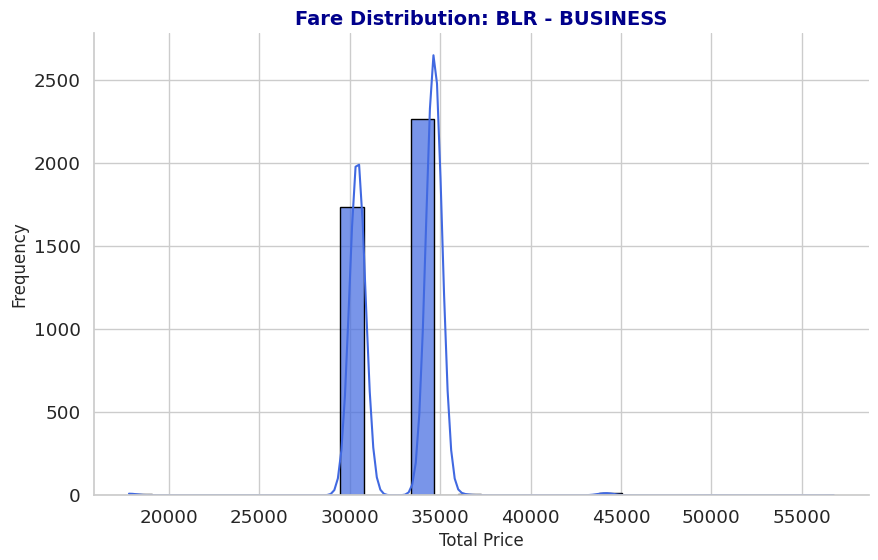

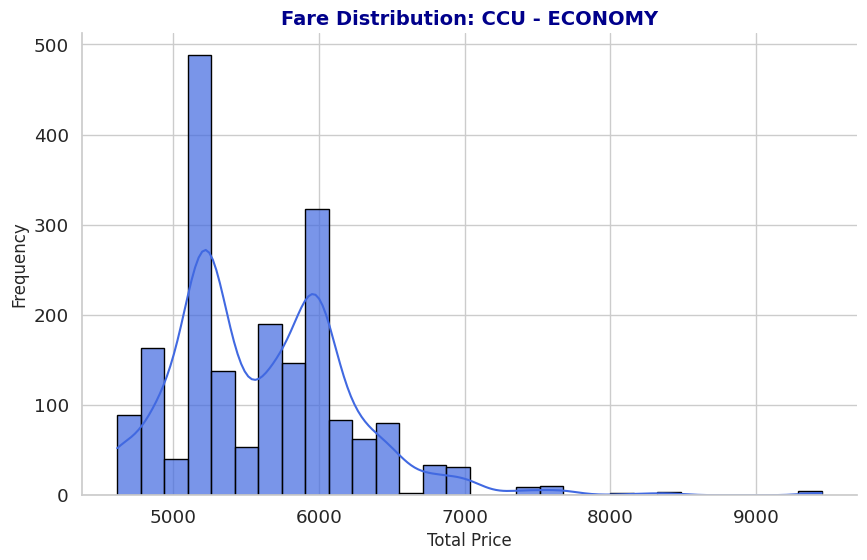

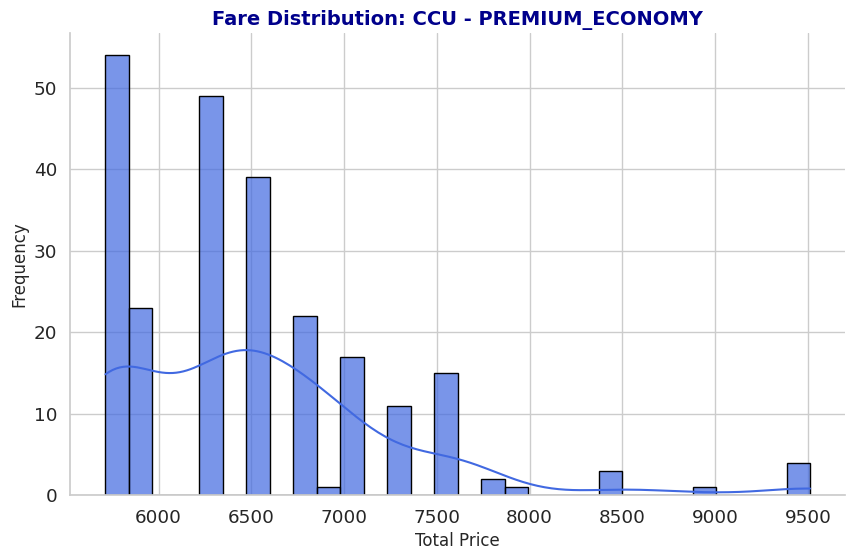

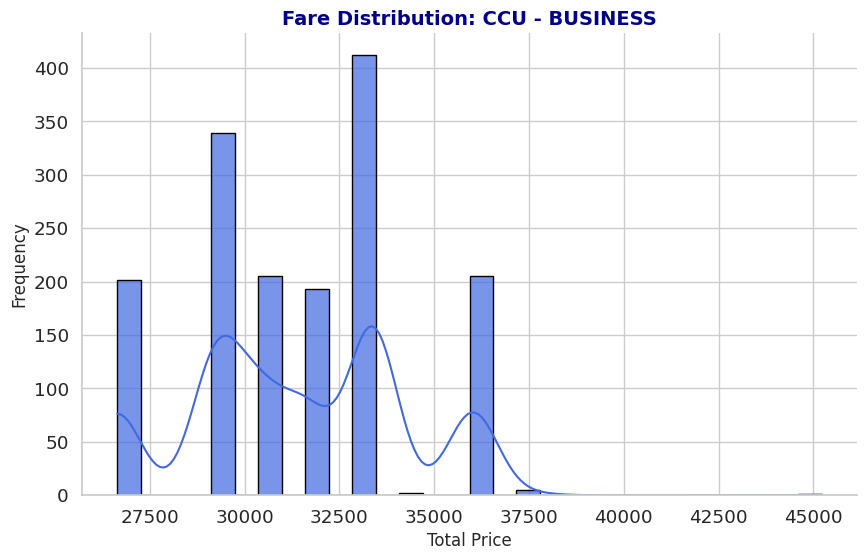

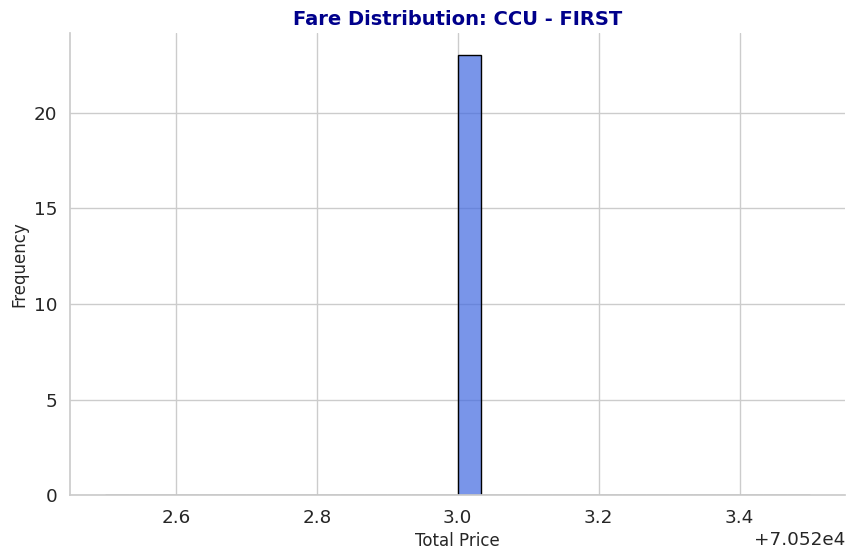

In [440]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern theme for better styling
sns.set_style("whitegrid")

for destination in df['Destination'].unique():
    for seat_class in df['Seat Class'].unique():
        subset = df[(df['Destination'] == destination) & (df['Seat Class'] == seat_class)]
        if not subset.empty:  # Check if the subset is not empty
            plt.figure(figsize=(10, 6))

            # Improved histogram with better color, transparency & edge color
            sns.histplot(subset['Total Price'], kde=True, bins=30, color="royalblue", edgecolor="black", alpha=0.7)

            # Title and labels with better styling
            plt.title(f'Fare Distribution: {destination} - {seat_class}', fontsize=14, fontweight='bold', color='darkblue')
            plt.xlabel('Total Price', fontsize=12)
            plt.ylabel('Frequency', fontsize=12)

            # Remove top & right spines for a clean look
            sns.despine()

            # Show the plot
            plt.show()


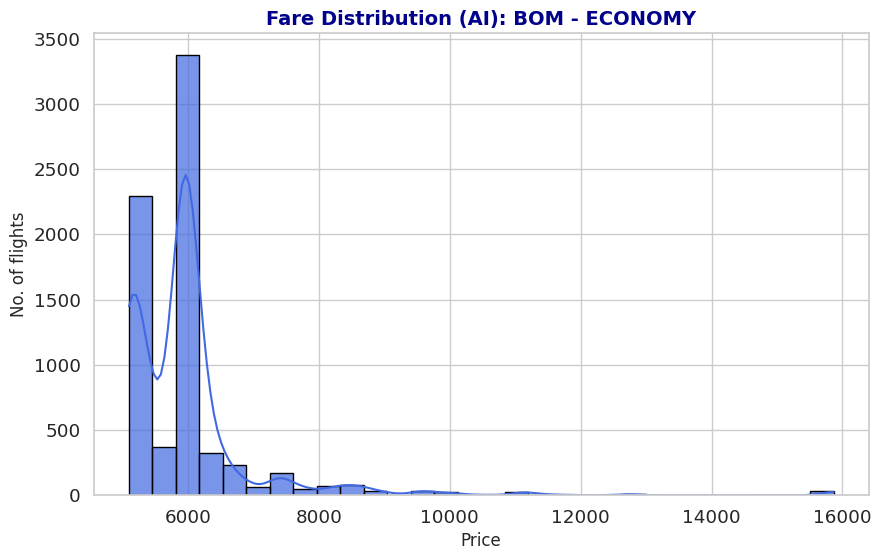

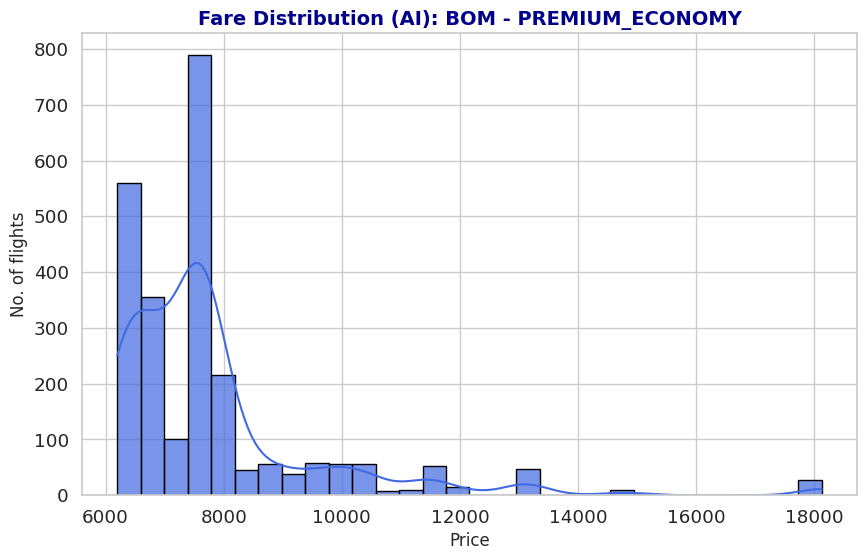

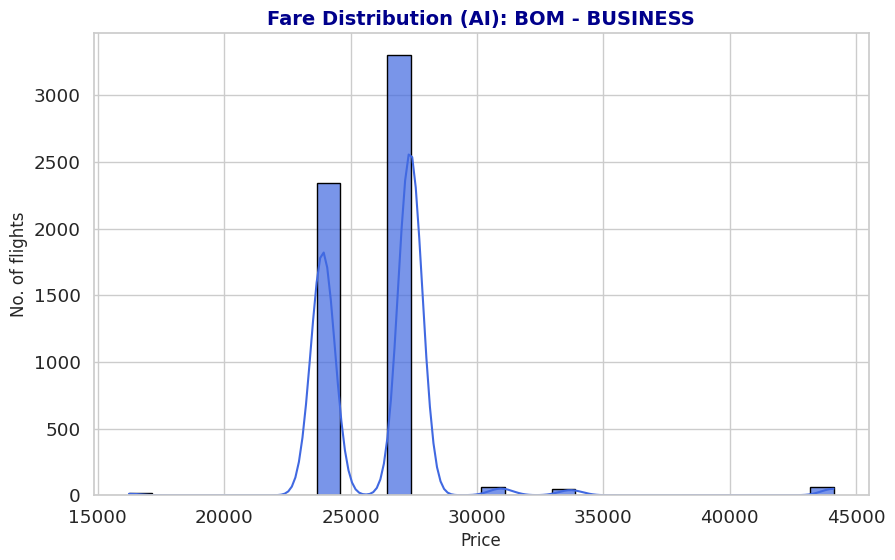

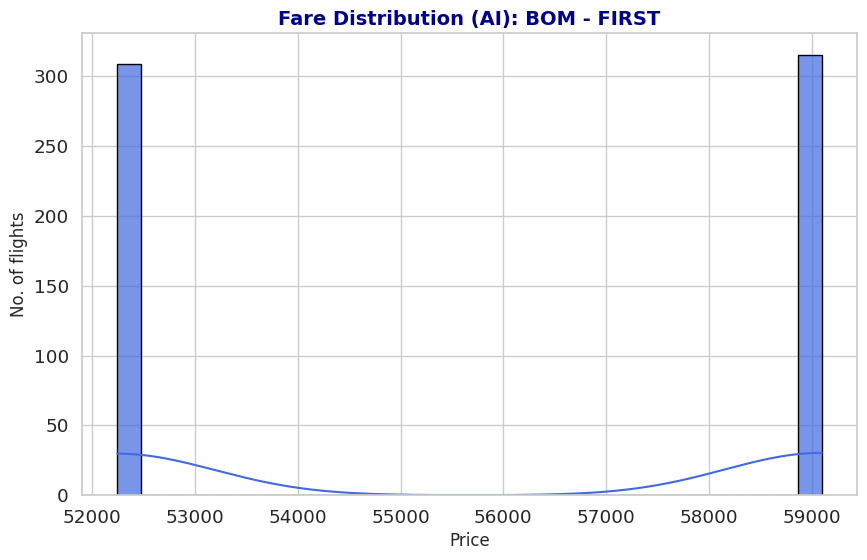

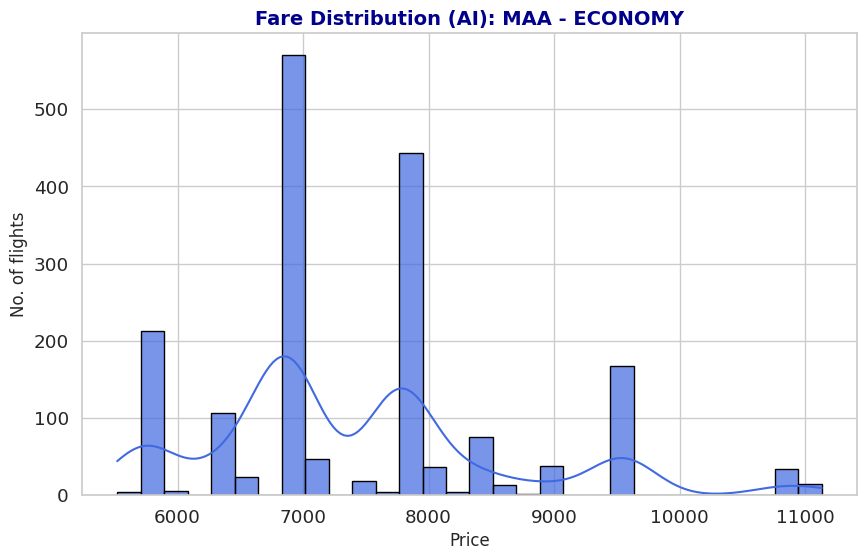

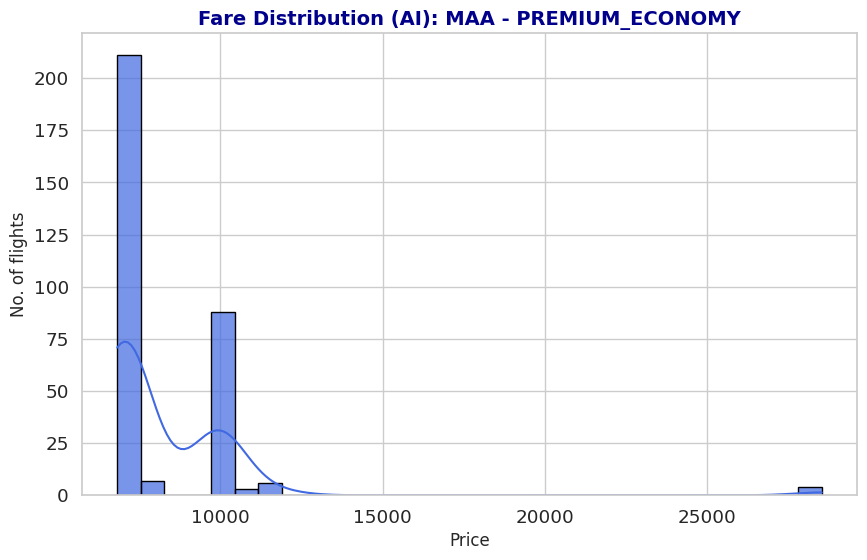

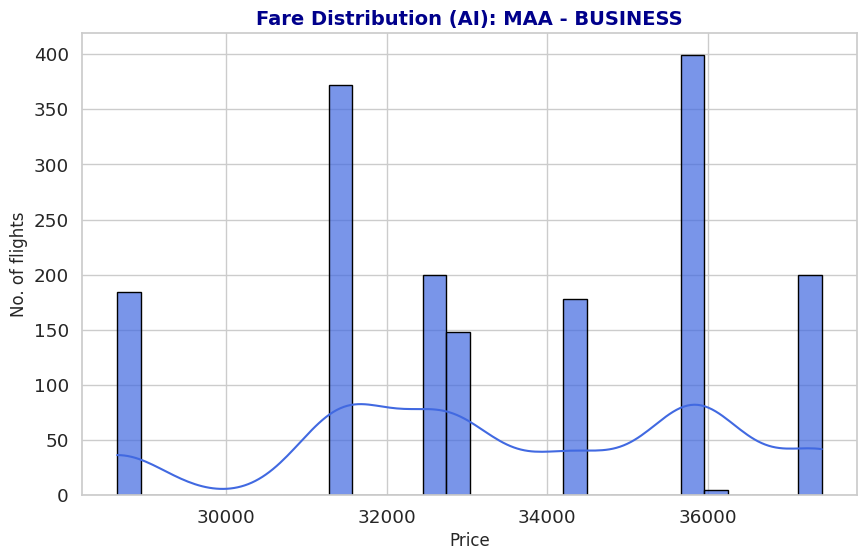

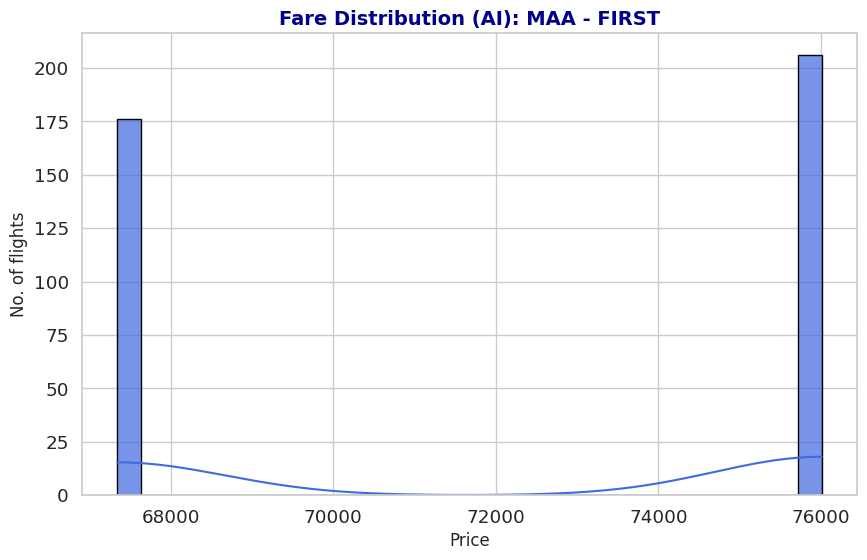

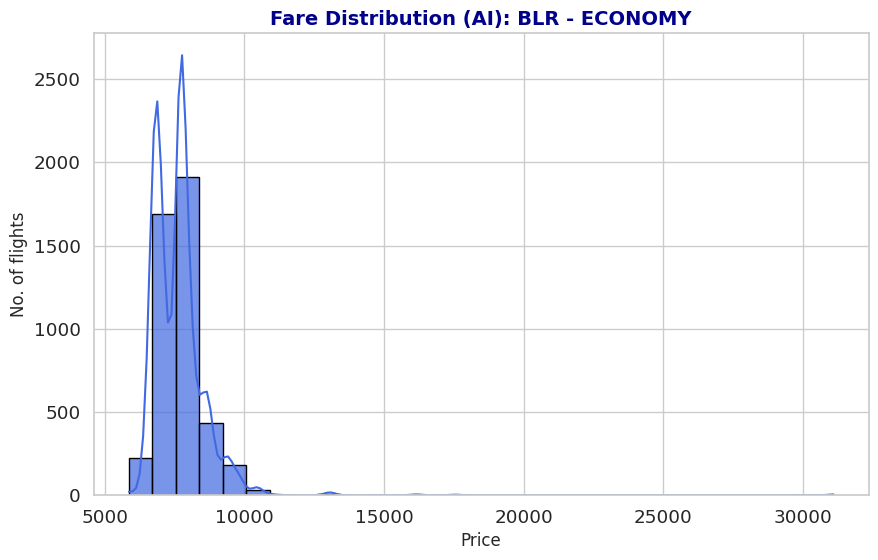

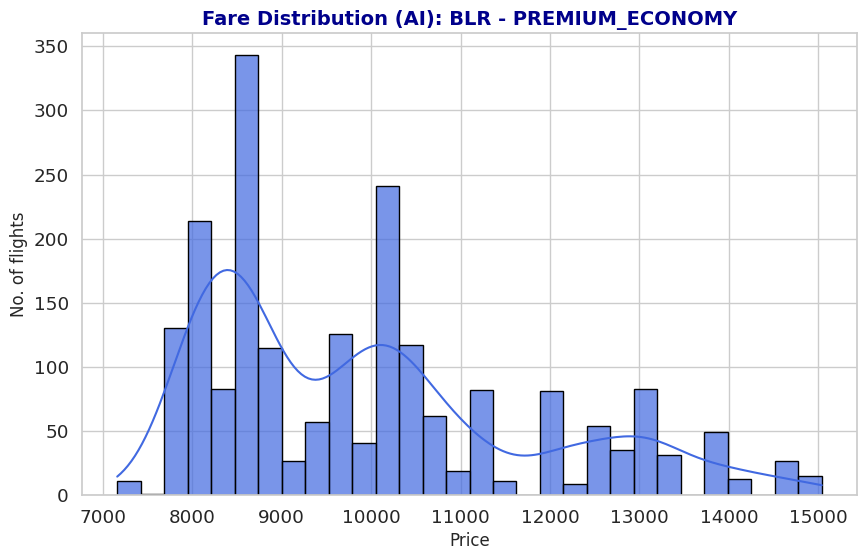

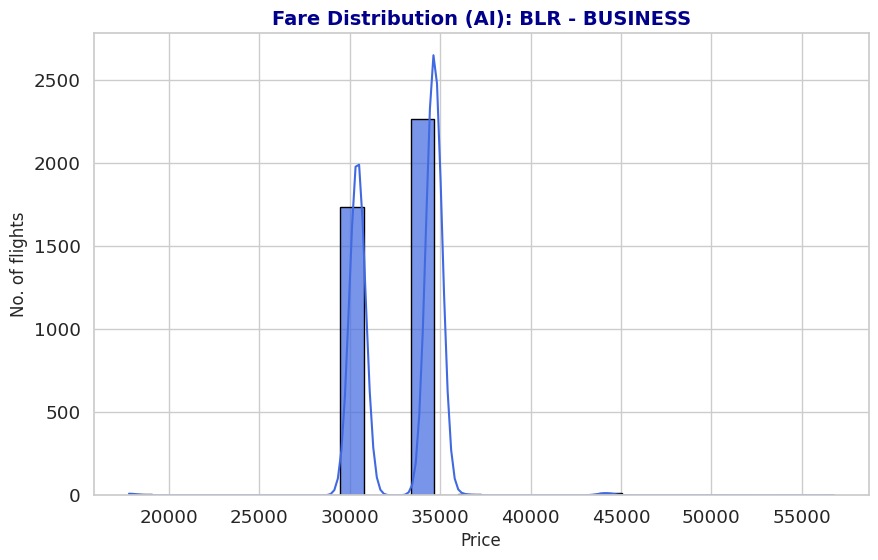

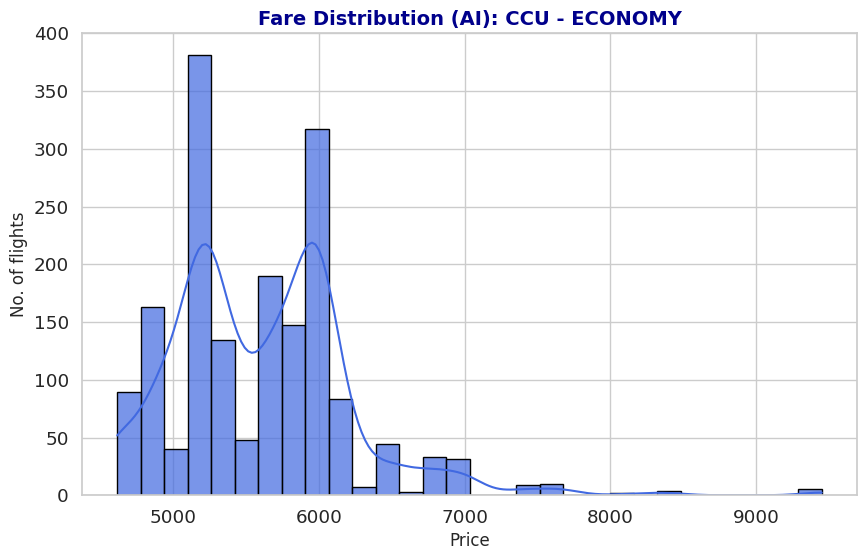

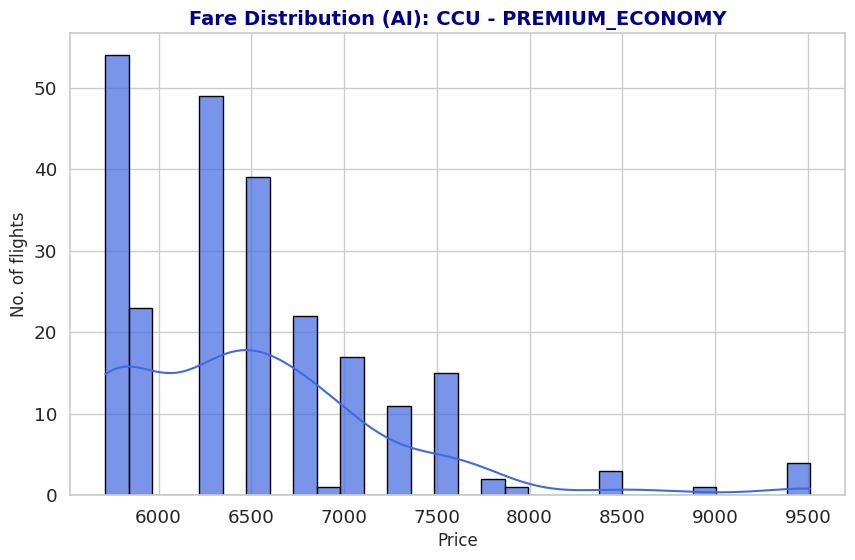

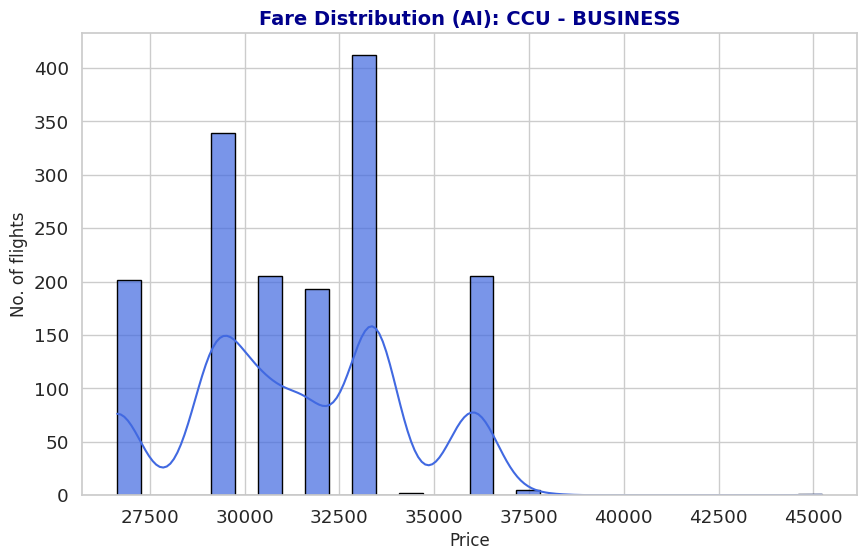

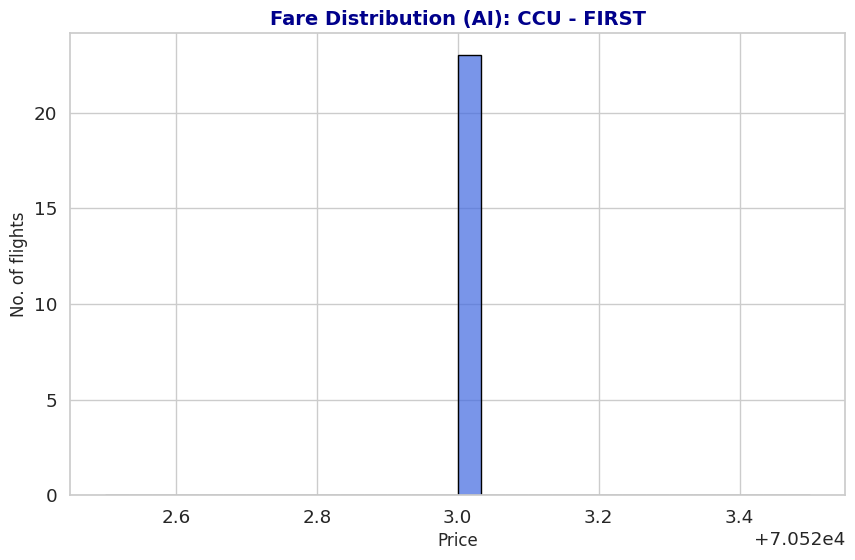

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern theme for better styling
sns.set_style("whitegrid")

# Filter data for Air India (AI)
df_ai = df[df['Airline'] == 'AI']

for destination in df_ai['Destination'].unique():
    for seat_class in df_ai['Seat Class'].unique():
        subset = df_ai[(df_ai['Destination'] == destination) & (df_ai['Seat Class'] == seat_class)]
        if not subset.empty:  # Check if the subset is not empty
            plt.figure(figsize=(10, 6))

            # Improved histogram with better color, transparency & edge color
            sns.histplot(subset['Total Price'], kde=True, bins=30, color="royalblue", edgecolor="black", alpha=0.7)

            # Title and labels with better styling
            plt.title(f'Fare Distribution (AI): {destination} - {seat_class}', fontsize=14, fontweight='bold', color='darkblue')
            plt.xlabel('Price', fontsize=12)
            plt.ylabel('No. of flights', fontsize=12)


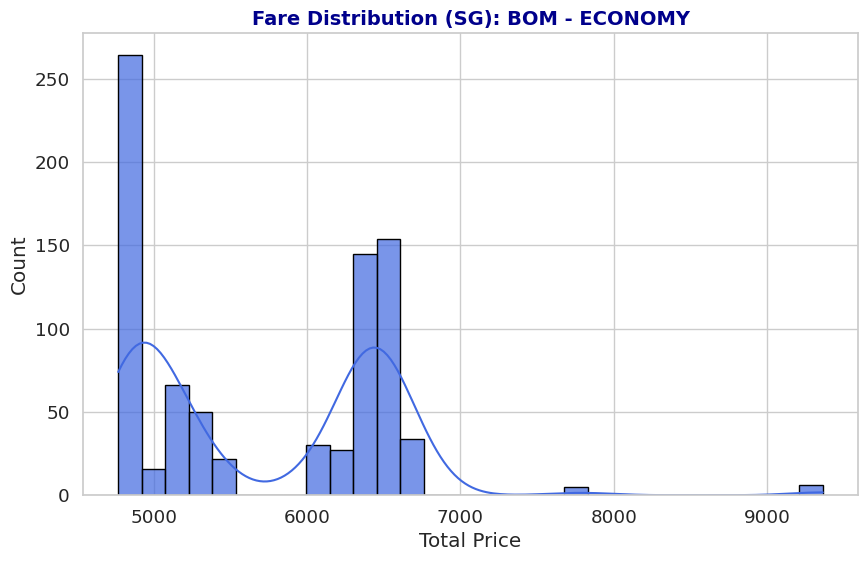

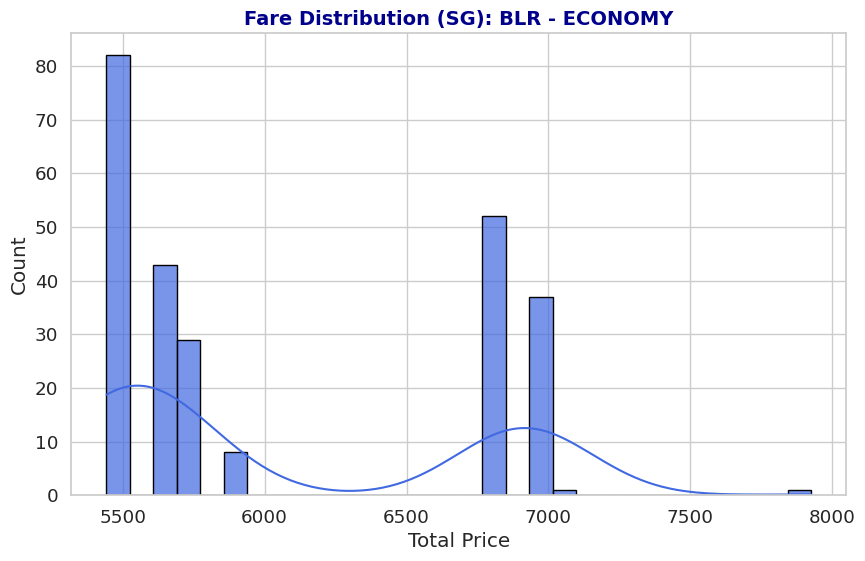

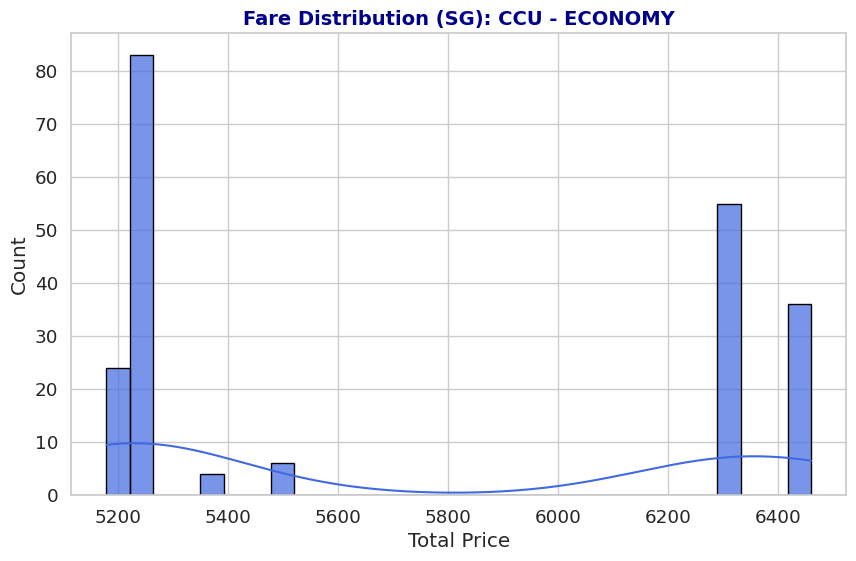

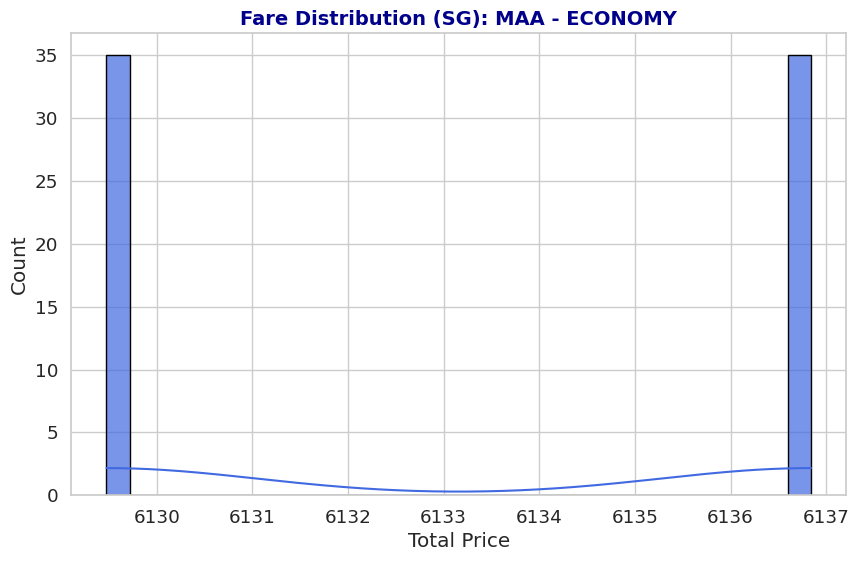

In [442]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern theme for better styling
sns.set_style("whitegrid")

# Filter data for Air India (AI)
df_ai = df[df['Airline'] == 'SG']

for destination in df_ai['Destination'].unique():
    for seat_class in df_ai['Seat Class'].unique():
        subset = df_ai[(df_ai['Destination'] == destination) & (df_ai['Seat Class'] == seat_class)]
        if not subset.empty:  # Check if the subset is not empty
            plt.figure(figsize=(10, 6))

            # Improved histogram with better color, transparency & edge color
            sns.histplot(subset['Total Price'], kde=True, bins=30, color="royalblue", edgecolor="black", alpha=0.7)

            # Title and labels with better styling
            plt.title(f'Fare Distribution (SG): {destination} - {seat_class}', fontsize=14, fontweight='bold', color='darkblue')
            plt.xlabel


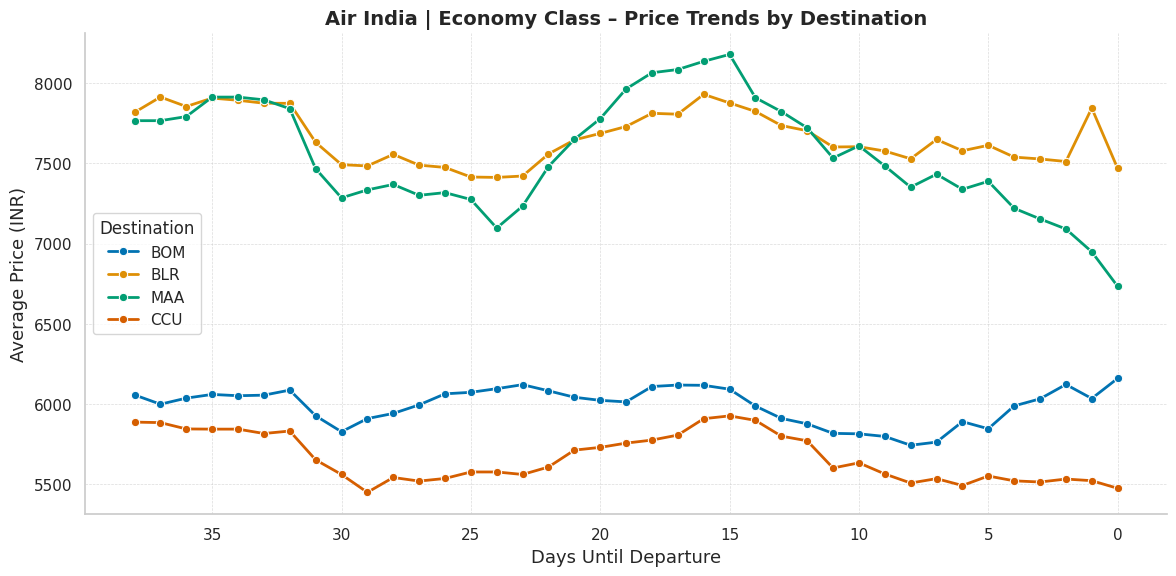

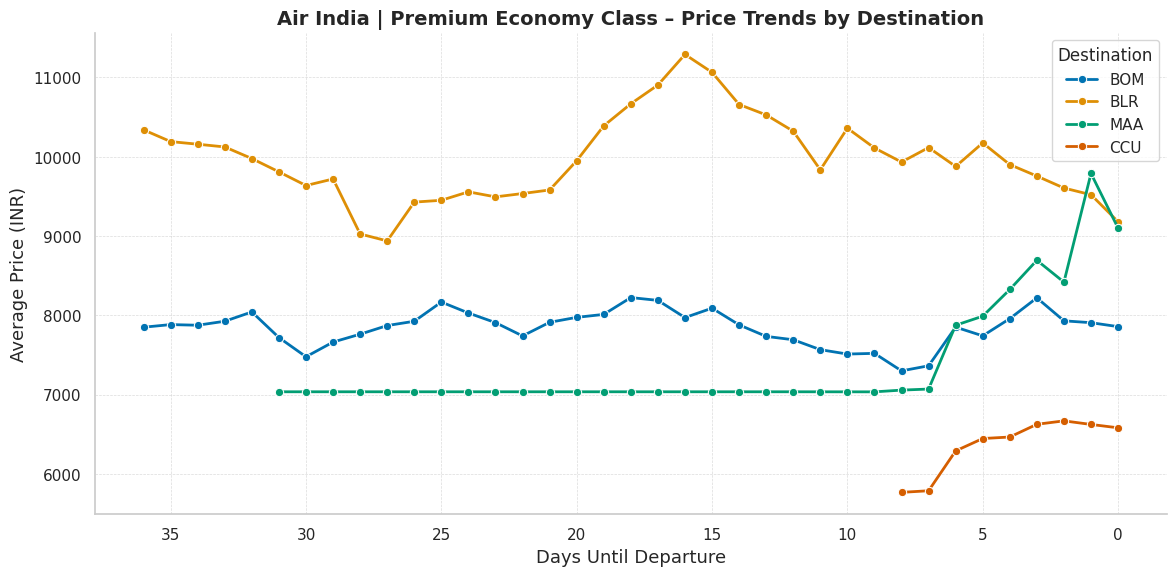

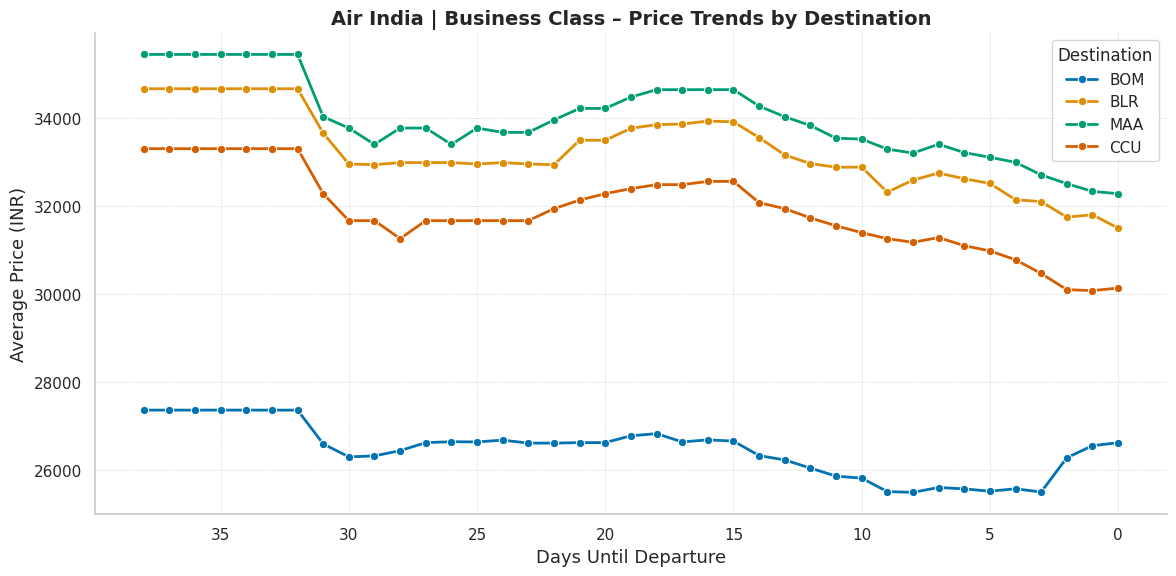

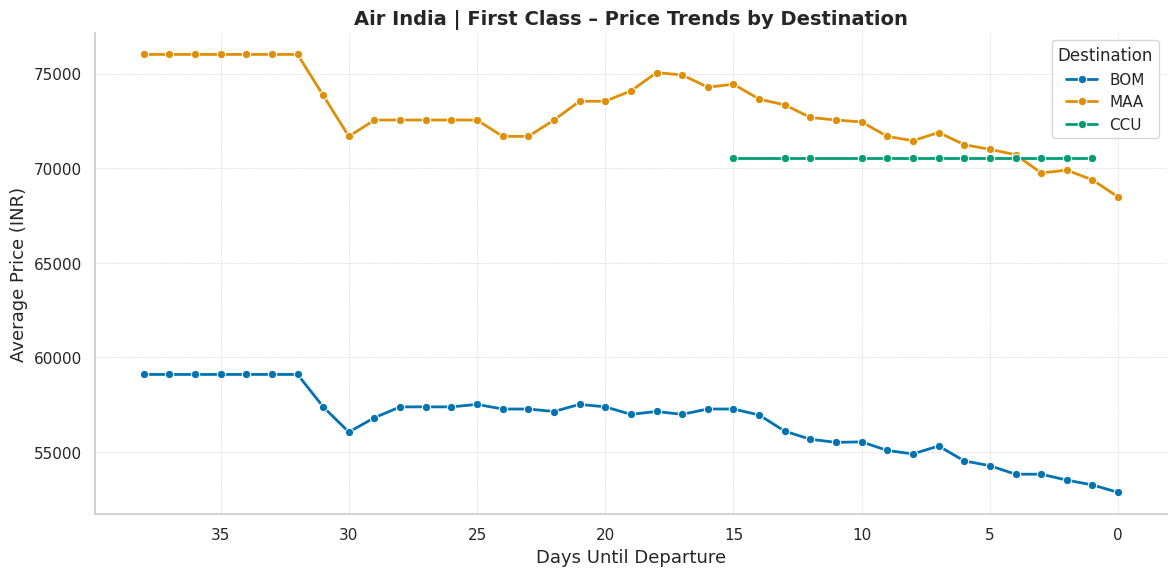

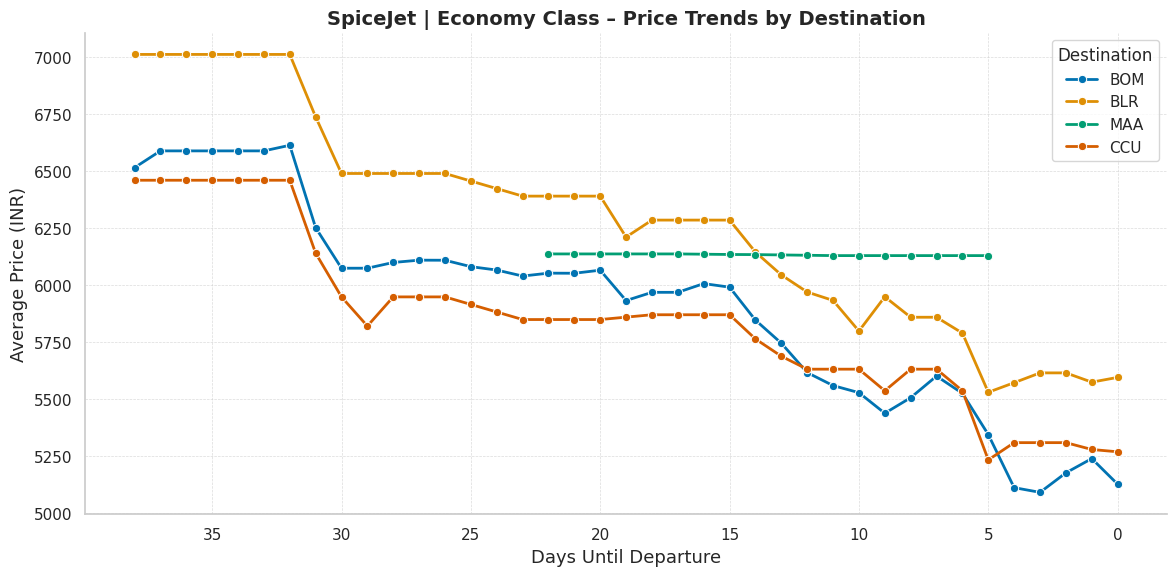

In [443]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seaborn theme settings
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
sns.set_palette("colorblind")

# ------------------------
# FOR AIR INDIA (AI)
# ------------------------
ai_df = df[df['Airline'] == 'AI']
seat_classes_ai = ['ECONOMY', 'PREMIUM_ECONOMY', 'BUSINESS', 'FIRST']
destinations = ['BOM', 'BLR', 'MAA', 'CCU']

for seat_class in seat_classes_ai:
    plt.figure(figsize=(12, 6))
    for destination in destinations:
        df_sub = ai_df[(ai_df['Seat Class'] == seat_class) & (ai_df['Destination'] == destination)]
        if not df_sub.empty:
            df_agg = df_sub.groupby('days_until_departure')['Total Price'].mean().reset_index()
            sns.lineplot(
                data=df_agg,
                x='days_until_departure',
                y='Total Price',
                marker='o',
                linewidth=2,
                label=destination
            )

    plt.title(f"Air India | {seat_class.replace('_', ' ').title()} Class – Price Trends by Destination", fontsize=14, fontweight='bold')
    plt.xlabel("Days Until Departure", fontsize=13)
    plt.ylabel("Average Price (INR)", fontsize=13)
    plt.gca().invert_xaxis()
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
    plt.legend(title="Destination", fontsize=11, title_fontsize=12, loc='best')
    sns.despine()
    plt.tight_layout()
    plt.show()

# ------------------------
# FOR SPICEJET (SG)
# ------------------------
sg_df = df[(df['Airline'] == 'SG') & (df['Seat Class'] == 'ECONOMY')]

plt.figure(figsize=(12, 6))
for destination in destinations:
    df_sub = sg_df[sg_df['Destination'] == destination]
    if not df_sub.empty:
        df_agg = df_sub.groupby('days_until_departure')['Total Price'].mean().reset_index()
        sns.lineplot(
            data=df_agg,
            x='days_until_departure',
            y='Total Price',
            marker='o',
            linewidth=2,
            label=destination
        )

plt.title("SpiceJet | Economy Class – Price Trends by Destination", fontsize=14, fontweight='bold')
plt.xlabel("Days Until Departure", fontsize=13)
plt.ylabel("Average Price (INR)", fontsize=13)
plt.gca().invert_xaxis()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(title="Destination", fontsize=11, title_fontsize=12, loc='best')
sns.despine()
plt.tight_layout()
plt.show()


<ipython-input-444-f338c37d757f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Seat Class', y='Total Price', data=df_dest, palette='Set2')


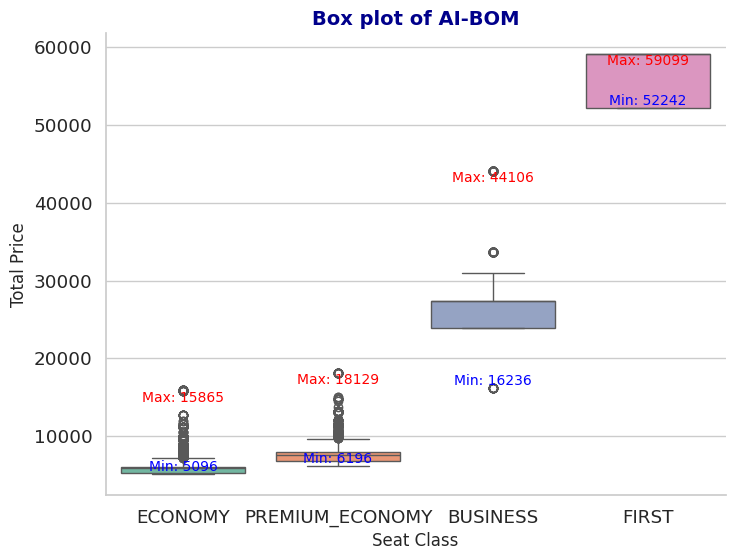

<ipython-input-444-f338c37d757f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Seat Class', y='Total Price', data=df_dest, palette='Set2')


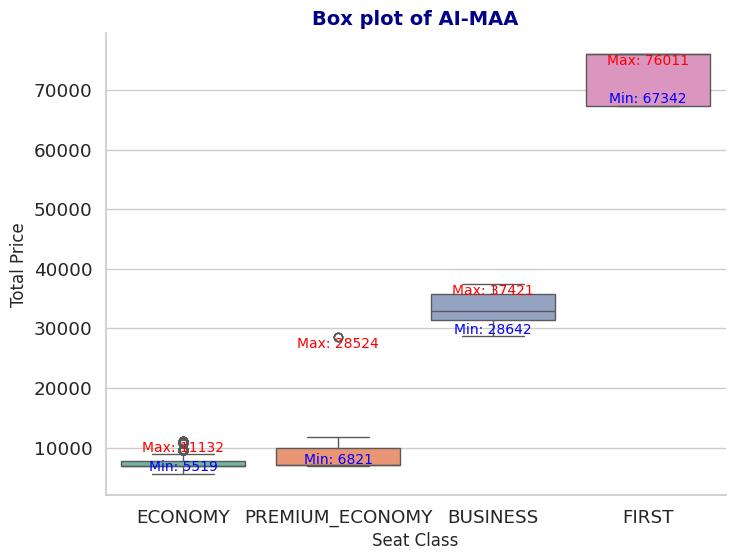

<ipython-input-444-f338c37d757f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Seat Class', y='Total Price', data=df_dest, palette='Set2')


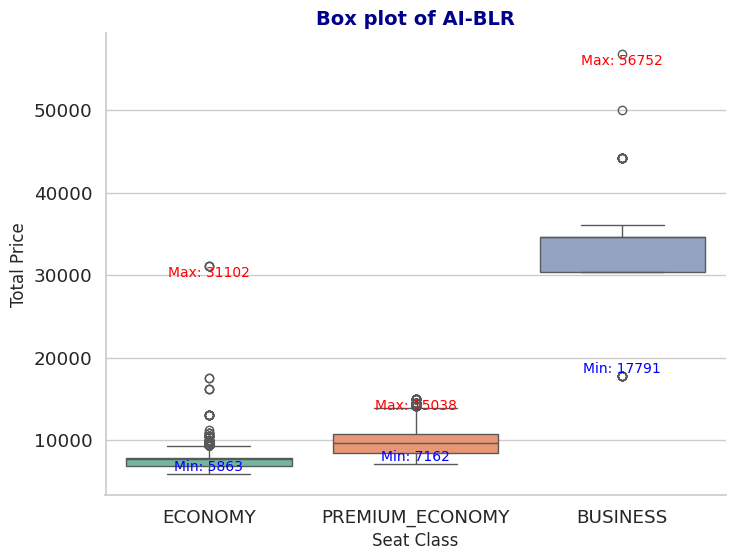

<ipython-input-444-f338c37d757f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Seat Class', y='Total Price', data=df_dest, palette='Set2')


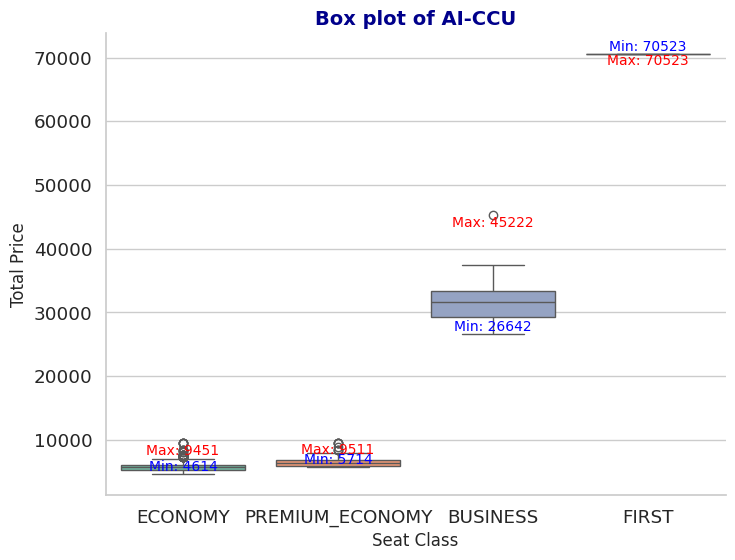

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Air India (AI)
df_ai = df[df['Airline'] == 'AI']

# Loop through each destination
for destination in df_ai['Destination'].unique():
    plt.figure(figsize=(8, 6))

    # Filter data for the specific destination
    df_dest = df_ai[df_ai['Destination'] == destination]

    # Create Boxplot
    ax = sns.boxplot(x='Seat Class', y='Total Price', data=df_dest, palette='Set2')

    # Annotate Min and Max values for each Seat Class
    for seat_class in df_dest['Seat Class'].unique():
        fares = df_dest[df_dest['Seat Class'] == seat_class]['Total Price']
        if not fares.empty:
            min_fare = fares.min()
            max_fare = fares.max()

            # Get x position of the current seat class
            x_pos = list(df_dest['Seat Class'].unique()).index(seat_class)

            # Annotate Min Fare
            ax.text(x_pos, min_fare, f'Min: {min_fare:.0f}', ha='center', va='bottom', fontsize=10, color='blue')

            # Annotate Max Fare
            ax.text(x_pos, max_fare, f'Max: {max_fare:.0f}', ha='center', va='top', fontsize=10, color='red')

    # Title and labels with better styling
    plt.title(f'Box plot of AI-{destination}', fontsize=14, fontweight='bold', color='darkblue')
    plt.xlabel('Seat Class', fontsize=12)
    plt.ylabel('Total Price', fontsize=12)

    # Clean up layout
    sns.despine()
    plt.show()


<ipython-input-445-666bd21c55ab>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Route_Class', y='Total Price', data=df_ai, palette='Set2')


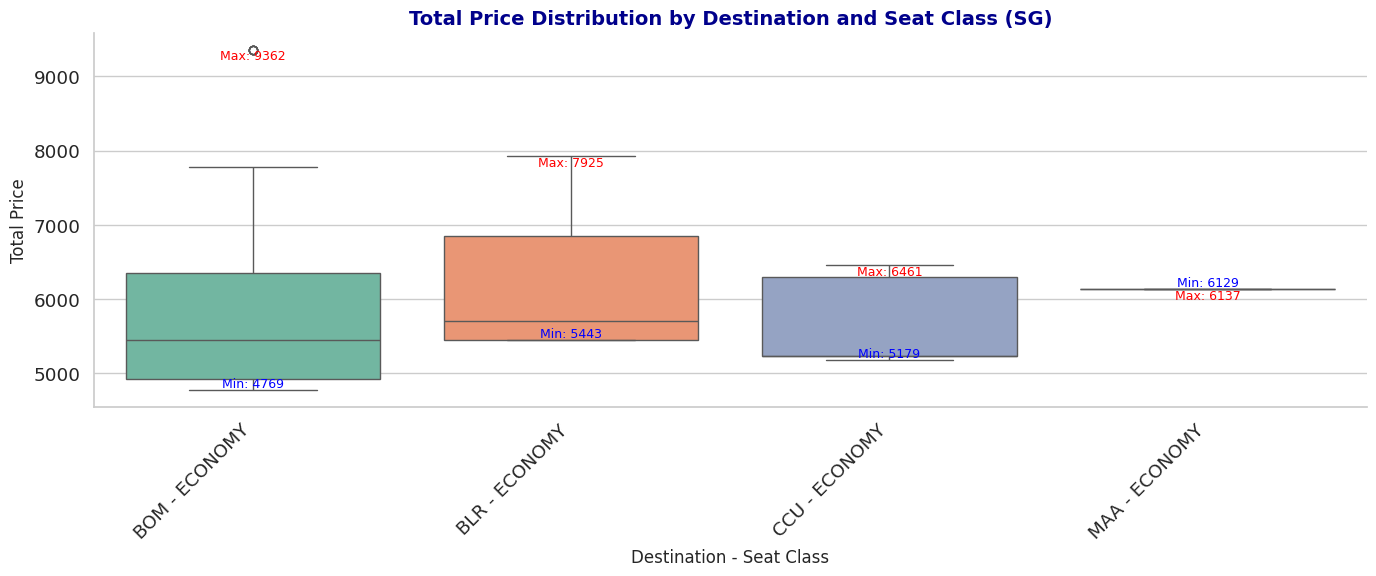

In [445]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for SG airline
df_ai = df[df['Airline'] == 'SG'].copy()

# Create a new column that combines Destination and Seat Class for plotting
df_ai['Route_Class'] = df_ai['Destination'] + ' - ' + df_ai['Seat Class']

# Set the plot size
plt.figure(figsize=(14, 6))

# Create boxplot
ax = sns.boxplot(x='Route_Class', y='Total Price', data=df_ai, palette='Set2')

# Annotate min and max fares for each Route_Class
for label in df_ai['Route_Class'].unique():
    fares = df_ai[df_ai['Route_Class'] == label]['Total Price']
    if not fares.empty:
        min_fare = fares.min()
        max_fare = fares.max()
        x_pos = list(df_ai['Route_Class'].unique()).index(label)

        # Min annotation
        ax.text(x_pos, min_fare, f'Min: {min_fare:.0f}', ha='center', va='bottom', fontsize=9, color='blue')

        # Max annotation
        ax.text(x_pos, max_fare, f'Max: {max_fare:.0f}', ha='center', va='top', fontsize=9, color='red')

# Style the plot
plt.title('Total Price Distribution by Destination and Seat Class (SG)', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Destination - Seat Class', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.tight_layout()
plt.show()


In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store whisker bounds
whisker_bounds = {}

# Get unique airlines, destinations, and seat classes
airlines = df['Airline'].unique()
destinations = df['Destination'].unique()
seat_classes = df['Seat Class'].unique()

# Loop through each Airline, Destination, and Seat Class to find boxplot whisker limits
for airline in airlines:
    for destination in destinations:
        for seat_class in seat_classes:
            subset = df[(df['Airline'] == airline) & (df['Destination'] == destination) & (df['Seat Class'] == seat_class)]

            if not subset.empty:
                # Calculate whisker boundaries using IQR
                Q1 = np.percentile(subset['Total Price'], 25)
                Q3 = np.percentile(subset['Total Price'], 75)
                IQR = Q3 - Q1
                lower_whisker = Q1 - 1.5 * IQR
                upper_whisker = Q3 + 1.5 * IQR

                whisker_bounds[(airline, destination, seat_class)] = (lower_whisker, upper_whisker)

# Function to remove outliers using precomputed whisker bounds
def remove_outliers_whiskers(row):
    key = (row['Airline'], row['Destination'], row['Seat Class'])
    if key in whisker_bounds:
        lower, upper = whisker_bounds[key]
        return lower <= row['Total Price'] <= upper
    return True  # Keep the row if no bounds are found

# Apply filtering
original_size = len(df)
df = df[df.apply(remove_outliers_whiskers, axis=1)]

# Print number of outliers removed
outliers_removed = original_size - len(df)
print(f"Outliers removed: {outliers_removed}")


Outliers removed: 1525


In [447]:
'''# Store original size before removing duplicates
original_size = len(df)

# Remove duplicate Total Prices
df = df.drop_duplicates(subset=['Fetch Date', 'Destination', 'days_until_departure', 'Total Price'])

# Calculate the number of rows removed
removed_rows = original_size - len(df)
print(f"Duplicate price entries removed: {removed_rows}")'''


'# Store original size before removing duplicates\noriginal_size = len(df)\n\n# Remove duplicate Total Prices\ndf = df.drop_duplicates(subset=[\'Fetch Date\', \'Destination\', \'days_until_departure\', \'Total Price\'])\n\n# Calculate the number of rows removed\nremoved_rows = original_size - len(df)\nprint(f"Duplicate price entries removed: {removed_rows}")'

In [448]:


# Group data by route and seat class, then find min, max, and average fare
route_seat_fare = df.groupby(['Destination','Airline', 'Seat Class'])['Total Price'].agg(['min', 'max', 'mean'])
print("Min, Max, and Average Fare for each Route and Seat Class:\n", route_seat_fare)




Min, Max, and Average Fare for each Route and Seat Class:
                                               min           max          mean
Destination Airline Seat Class                                               
BLR         AI      BUSINESS         30422.000000  36064.000000  32829.255988
                    ECONOMY           5863.000000   9282.000000   7495.158596
                    PREMIUM_ECONOMY   7162.000000  13907.000000   9832.957962
            SG      ECONOMY           5442.631579   7925.263158   6055.991263
BOM         AI      BUSINESS         23902.000000  30954.000000  25981.919895
                    ECONOMY           5096.000000   7186.000000   5731.377517
                    FIRST            52242.000000  59099.000000  55704.878205
                    PREMIUM_ECONOMY   6196.000000   9606.000000   7287.541761
            SG      ECONOMY           4768.947368   7784.736842   5693.308086
CCU         AI      BUSINESS         26642.000000  37522.000000  31376.060781
     

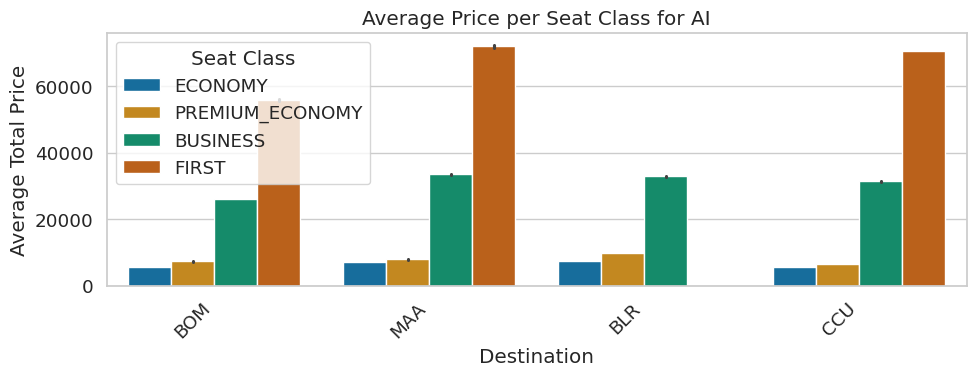

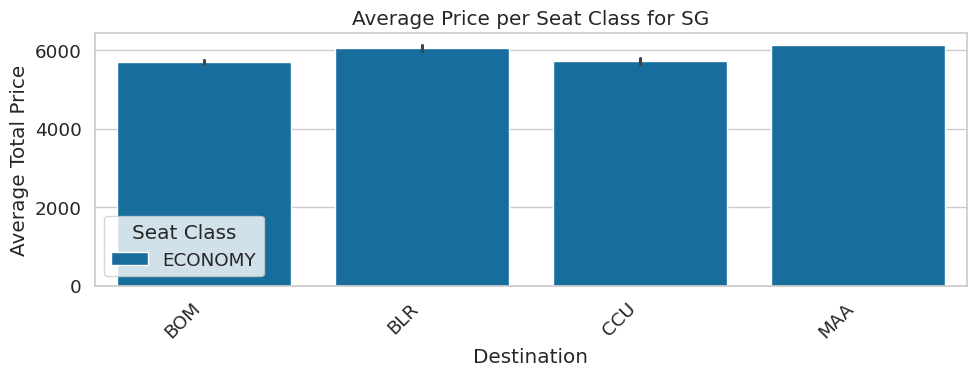

In [449]:
import seaborn as sns

# Assuming df is already loaded
airlines = df['Airline'].unique()  # Get unique airline names

for airline in airlines:
    plt.figure(figsize=(10, 4))

    # Filter data for the current airline
    df_airline = df[df['Airline'] == airline]

    # Barplot: Destination vs. Total Price (per seat class)
    sns.barplot(x='Destination', y='Total Price', hue='Seat Class', data=df_airline, estimator=lambda x: x.mean())

    plt.title(f'Average Price per Seat Class for {airline}')
    plt.xlabel('Destination')
    plt.ylabel('Average Total Price')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Seat Class')
    plt.tight_layout()

    # Show each plot separately
    plt.show()

In [450]:
df['Flight Number'] = df['Flight Number'].str.replace(r'[^\d]', '', regex=True)


In [451]:
df.drop(columns=['Origin','Arrival Time'],inplace=True)

In [452]:
df['Total Price'] = df['Total Price'].astype(int)
df['Flight Number'] = df['Flight Number'].astype(int)

In [453]:
df['Fetch Month'] =df['Fetch Date'].dt.month
df['Fetch Day'] = df['Fetch Date'].dt.day
df['Departure Month'] =df['Departure Date'].dt.month
df['Departure Day'] = df['Departure Date'].dt.day

In [454]:
# Step 2: Extract the day of the week (0=Monday, 6=Sunday)
df['Day of Week'] = df['Departure Date'].dt.dayofweek
# Step 3: Create a binary feature for weekend (1 = Weekend, 0 = Weekday)
df['Is Weekend'] = df['Day of Week'].apply(lambda x: 1 if x > 5 else 0)

In [455]:
df.head()

Fetch Date  Flight Number Airline Destination Departure Date  \
0 2025-04-05 06:44:11           2993      AI         BOM     2025-04-05   
1 2025-04-05 06:44:11           2420      AI         BOM     2025-04-05   
2 2025-04-05 06:44:11           2112      AI         BOM     2025-04-05   
3 2025-04-05 06:44:11           2933      AI         BOM     2025-04-05   
4 2025-04-05 06:44:11           2957      AI         BOM     2025-04-05   

   Departure Time  Flight Duration Seat Class  Total Price  \
0       12.583333              135    ECONOMY         5144   
1       14.916667              140    ECONOMY         5144   
2       14.166667              145    ECONOMY         5144   
3       15.333333              145    ECONOMY         5144   
4       20.500000              145    ECONOMY         5144   

   days_until_departure  Fetch Month  Fetch Day  Departure Month  \
0                     0            4          5                4   
1                     0            4          5                4   
2                     0            4          5                4   
3                     0            4          5                4   
4                     0            4          5                4   

   Departure Day  Day of Week  Is Weekend  
0              5            5           0  
1              5            5           0  
2              5            5           0  
3              5            5           0  
4              5            5           0

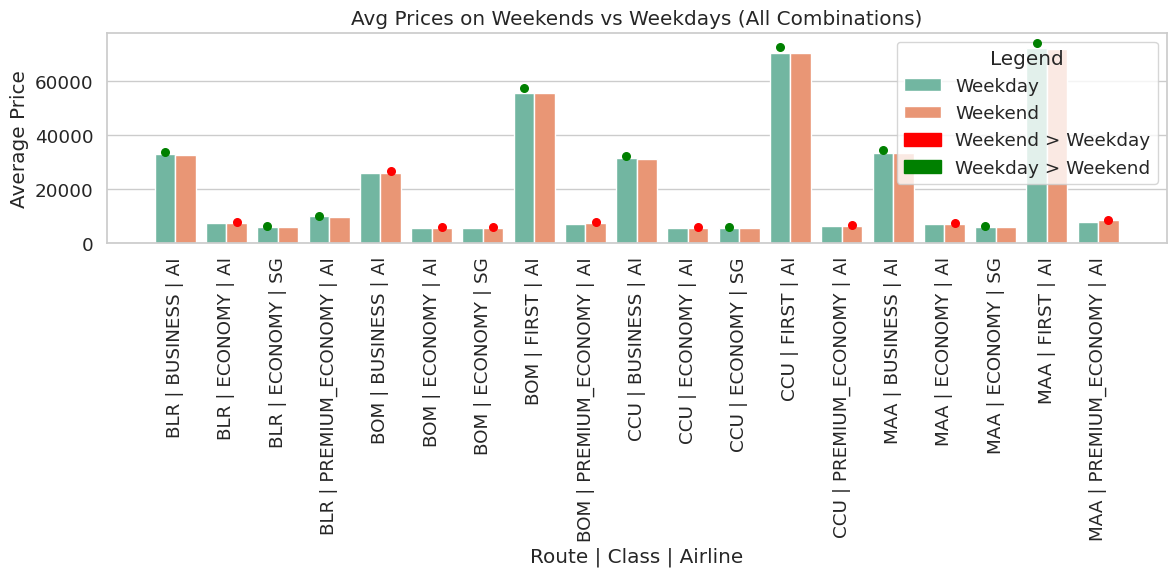

In [456]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches



# Group and prepare for plot
grouped_all = df.groupby(['Destination', 'Seat Class', 'Airline', 'Is Weekend'])['Total Price'].mean().reset_index()
grouped_all['Group'] = grouped_all['Destination'] + ' | ' + grouped_all['Seat Class'] + ' | ' + grouped_all['Airline']
grouped_all['Weekend_Label'] = grouped_all['Is Weekend'].map({0: 'Weekday', 1: 'Weekend'})

# Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=grouped_all, x='Group', y='Total Price', hue='Weekend_Label', palette='Set2')

# Pivot for comparison
pivot = grouped_all.pivot(index='Group', columns='Is Weekend', values='Total Price').reset_index()
group_pos = {group: i for i, group in enumerate(grouped_all['Group'].unique())}

# Add small indicator dot above the taller bar
for _, row in pivot.iterrows():
    group = row['Group']
    weekday_price = row.get(0, np.nan)
    weekend_price = row.get(1, np.nan)
    if np.isnan(weekday_price) or np.isnan(weekend_price):
        continue
    base_x = group_pos[group]
    if weekend_price > weekday_price:
        x = base_x + 0.2
        y = weekend_price
        color = 'red'
    else:
        x = base_x - 0.2
        y = weekday_price
        color = 'green'
    plt.scatter(x, y * 1.03, color=color, s=30, zorder=10)

# Combine legends (barplot legend + dot meaning)
handles, labels = barplot.get_legend_handles_labels()
red_dot = mpatches.Patch(color='red', label='Weekend > Weekday')
green_dot = mpatches.Patch(color='green', label='Weekday > Weekend')
plt.legend(handles=handles + [red_dot, green_dot], title='Legend', loc='upper right')

# Final tweaks
plt.title('Avg Prices on Weekends vs Weekdays (All Combinations)')
plt.xticks(rotation=90)
plt.ylabel('Average Price')
plt.xlabel('Route | Class | Airline')
plt.tight_layout()
plt.show()


In [457]:
# ✅ Extended list of impactful Indian holidays in 2025
indian_holidays = pd.to_datetime([
    # January
    '2025-01-01',  # New Year's Day
    '2025-01-14',  # Makar Sankranti / Pongal
    '2025-01-26',  # Republic Day

    # February
    '2025-02-26',  # Maha Shivratri

    # March
    '2025-03-14',  # Holi
    '2025-03-28',  # Good Friday
    '2025-03-30',  # Ugadi / Gudi Padwa
    '2025-03-31',  # Eid al-Fitr

    # April
    '2025-04-10',  # Mahavir Jayanti
    '2025-04-14',  # Ambedkar Jayanti / Vaisakhi / Tamil New Year / Vishu / Bihu
    '2025-04-18',  # Ram Navami

    # May
    '2025-05-12',  # Buddha Purnima
    '2025-05-25',  # School summer vacation starts

    # June
    '2025-06-06',  # Bakrid (Eid al-Adha)

    # August
    '2025-08-15',  # Independence Day
    '2025-08-16',  # Janmashtami
    '2025-08-29',  # Raksha Bandhan

    # September
    '2025-09-06',  # Muharram
    '2025-09-29',  # Navratri Begins

    # October
    '2025-10-02',  # Gandhi Jayanti
    '2025-10-10',  # Dussehra
    '2025-10-21',  # Diwali
    '2025-10-22',  # Govardhan Puja
    '2025-10-23',  # Bhai Dooj

    # November
    '2025-11-05',  # Guru Nanak Jayanti
    '2025-11-15',  # Chhath Puja

    # December
    '2025-12-24',  # Christmas Eve
    '2025-12-25',  # Christmas
    '2025-12-31',  # New Year's Eve
])

In [458]:
def holiday_impact(date, holiday_dates, decay_rate=0.5, window=8):
    date = date.date()  # Convert to date if it's datetime
    for holiday in holiday_dates:
        if holiday.date() == date:
            return 1.0  # Exact match gets full impact
    total_impact = 0
    for holiday in holiday_dates:
        days_diff = abs((date - holiday.date()).days)
        if days_diff <= window:
            total_impact += np.exp(-decay_rate * days_diff)
    return total_impact


In [459]:
# Add a new column for Holiday Impact
df['Holiday Impact'] = df['Fetch Date'].apply(lambda d: holiday_impact(d, indian_holidays))


In [460]:
import pandas as pd

# Identify categorical columns dynamically
categorical_columns = ["Airline", "Destination", "Seat Class"]

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

# Convert only the boolean columns (True/False) to 0/1
df[df.select_dtypes('bool').columns] = df.select_dtypes('bool').astype(int)


In [461]:
df.drop(columns=['Fetch Date','Departure Date'],inplace=True)

In [462]:
#df.drop(columns=['Holiday Impact','Is Weekend'],inplace=True)

In [463]:
df.head()

Flight Number  Departure Time  Flight Duration  Total Price  \
0           2993       12.583333              135         5144   
1           2420       14.916667              140         5144   
2           2112       14.166667              145         5144   
3           2933       15.333333              145         5144   
4           2957       20.500000              145         5144   

   days_until_departure  Fetch Month  Fetch Day  Departure Month  \
0                     0            4          5                4   
1                     0            4          5                4   
2                     0            4          5                4   
3                     0            4          5                4   
4                     0            4          5                4   

   Departure Day  Day of Week  ...  Airline_AI  Airline_SG  Destination_BLR  \
0              5            5  ...           1           0                0   
1              5            5  ...           1           0                0   
2              5            5  ...           1           0                0   
3              5            5  ...           1           0                0   
4              5            5  ...           1           0                0   

   Destination_BOM  Destination_CCU  Destination_MAA  Seat Class_BUSINESS  \
0                1                0                0                    0   
1                1                0                0                    0   
2                1                0                0                    0   
3                1                0                0                    0   
4                1                0                0                    0   

   Seat Class_ECONOMY  Seat Class_FIRST  Seat Class_PREMIUM_ECONOMY  
0                   1                 0                           0  
1                   1                 0                           0  
2                   1                 0                           0  
3                   1                 0                           0  
4                   1                 0                           0  

[5 rows x 22 columns]

In [464]:
df.dtypes

Flight Number                   int64
Departure Time                float64
Flight Duration                 int64
Total Price                     int64
days_until_departure            int64
Fetch Month                     int32
Fetch Day                       int32
Departure Month                 int32
Departure Day                   int32
Day of Week                     int32
Is Weekend                      int64
Holiday Impact                float64
Airline_AI                      int64
Airline_SG                      int64
Destination_BLR                 int64
Destination_BOM                 int64
Destination_CCU                 int64
Destination_MAA                 int64
Seat Class_BUSINESS             int64
Seat Class_ECONOMY              int64
Seat Class_FIRST                int64
Seat Class_PREMIUM_ECONOMY      int64
dtype: object

In [465]:
# Combine all features
X = df.drop(['Total Price'],axis=1)
y = df['Total Price']


In [466]:
# Define the desired column order
desired_order = [
    'Flight Number', 'Departure Time', 'Flight Duration',
    'days_until_departure', 'Airline_AI', 'Airline_SG',
    'Destination_BLR', 'Destination_BOM', 'Destination_CCU', 'Destination_MAA',
    'Seat Class_BUSINESS', 'Seat Class_ECONOMY', 'Seat Class_FIRST', 'Seat Class_PREMIUM_ECONOMY',
    'Fetch Month', 'Fetch Day', 'Departure Month', 'Departure Day',
    'Day of Week', 'Is Weekend', 'Holiday Impact'
]

# Reorder the DataFrame columns
X = X[desired_order]


In [467]:

from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)



In [468]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Support Vector Regressor
from sklearn.svm import SVR

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# XGBoost Regressor
from xgboost import XGBRegressor


In [469]:
X_test.columns

Index(['Flight Number', 'Departure Time', 'Flight Duration',
       'days_until_departure', 'Airline_AI', 'Airline_SG', 'Destination_BLR',
       'Destination_BOM', 'Destination_CCU', 'Destination_MAA',
       'Seat Class_BUSINESS', 'Seat Class_ECONOMY', 'Seat Class_FIRST',
       'Seat Class_PREMIUM_ECONOMY', 'Fetch Month', 'Fetch Day',
       'Departure Month', 'Departure Day', 'Day of Week', 'Is Weekend',
       'Holiday Impact'],
      dtype='object')

In [470]:
# Initialize models
lr = LinearRegression()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svm = SVR()



In [471]:
# Fit models on training data
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

In [472]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [473]:
# Evaluate models
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest",
              "Support Vector Machine", "Gradient Boosting", "XGBoost"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_svm),
        mean_absolute_error(y_test, y_pred_gb),
        mean_absolute_error(y_test, y_pred_xgb)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_svm),
        mean_squared_error(y_test, y_pred_gb),
        mean_squared_error(y_test, y_pred_xgb)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_svm),
        r2_score(y_test, y_pred_gb),
        r2_score(y_test, y_pred_xgb)
    ]
}

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Sort the DataFrame based on R2 Score (Higher is better)
results_df = results_df.sort_values(by='R2 Score', ascending=False)

# Display the results
print(results_df)


                    Model           MAE           MSE  R2 Score
2           Random Forest    115.091099  1.452089e+05  0.999256
5                 XGBoost    159.500412  1.617675e+05  0.999171
1           Decision Tree     99.240470  2.147426e+05  0.998899
4       Gradient Boosting    434.454264  4.592578e+05  0.997646
0       Linear Regression   1571.464027  4.149183e+06  0.978728
3  Support Vector Machine  10798.998408  2.760662e+08 -0.415314


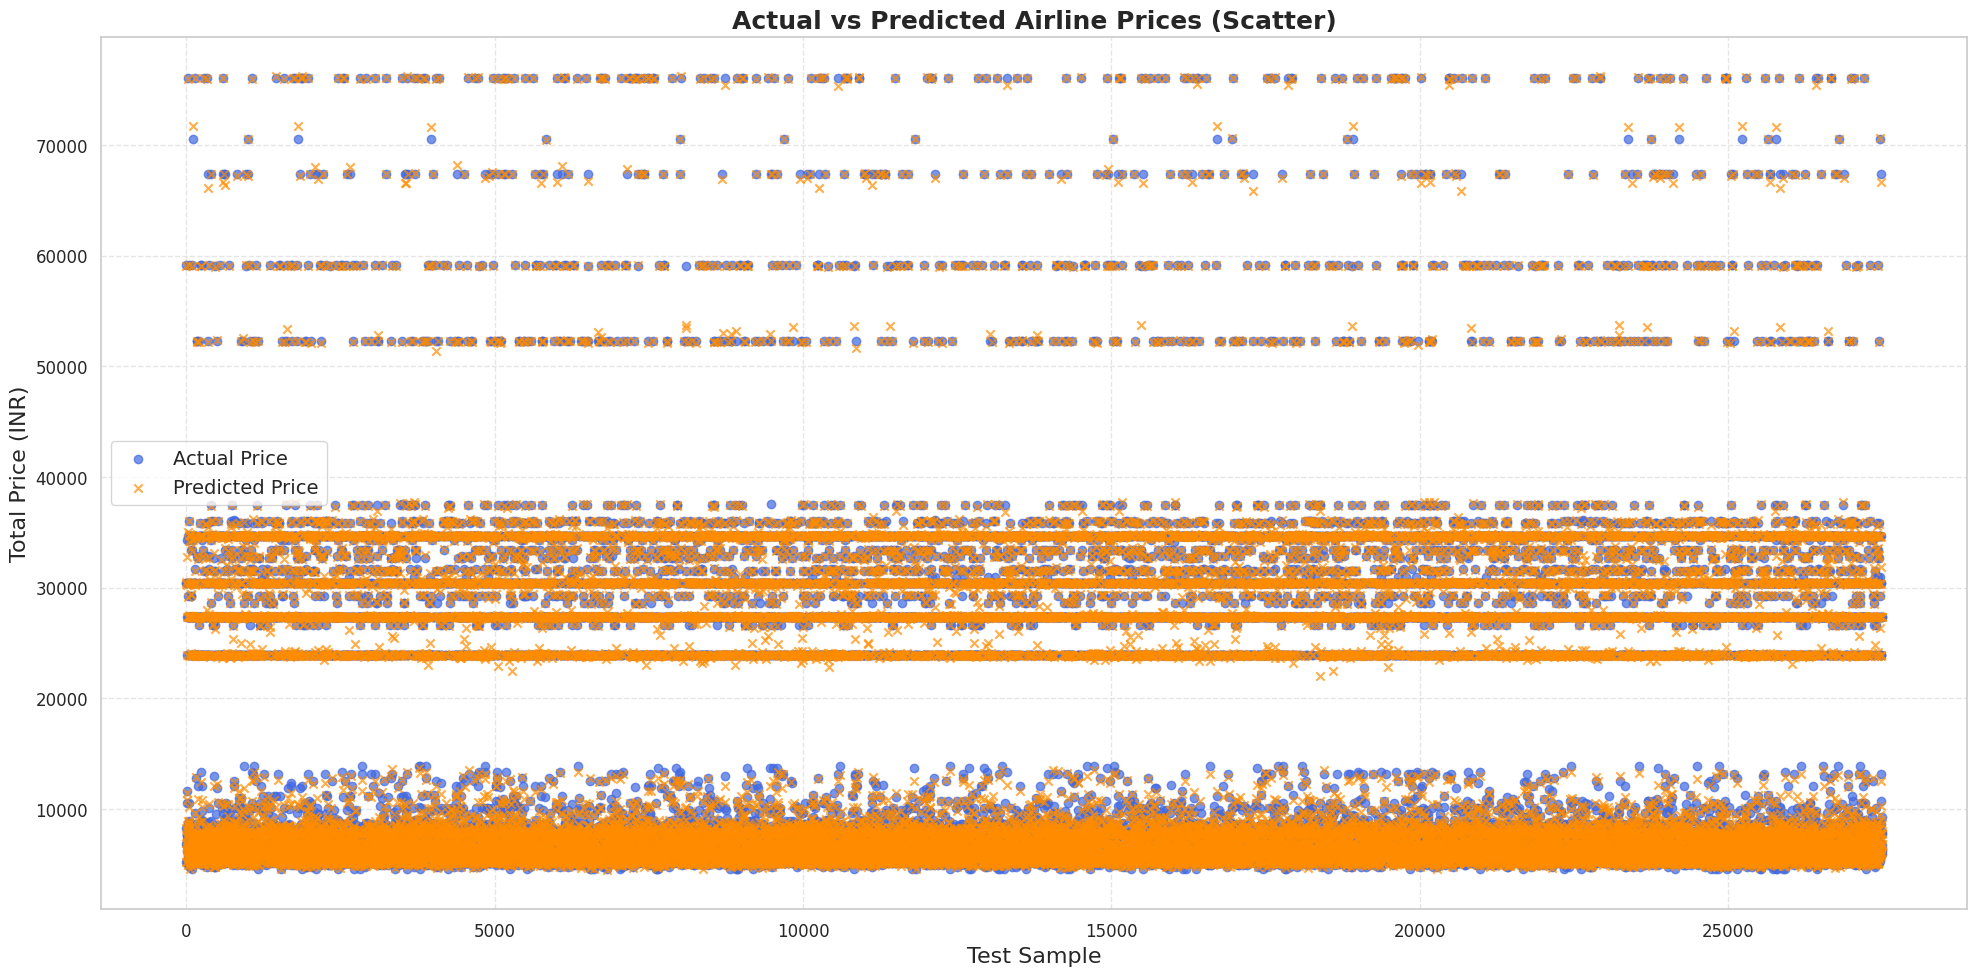

In [474]:
# Make sure both are 1D and reset index
y_test = y_test.reset_index(drop=True)
y_pred_xgb = pd.Series(y_pred_xgb).reset_index(drop=True)

# Plot
plt.figure(figsize=(20, 10))
plt.scatter(range(len(y_test)), y_test, label='Actual Price', color='royalblue', marker='o', alpha=0.7)
plt.scatter(range(len(y_pred_xgb)), y_pred_xgb, label='Predicted Price', color='darkorange', marker='x', alpha=0.7)

# Labels and styling
plt.xlabel('Test Sample', fontsize=16)
plt.ylabel('Total Price (INR)', fontsize=16)
plt.title('Actual vs Predicted Airline Prices (Scatter)', fontsize=18, fontweight='bold')
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [475]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 units and ReLU activation
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),# Hidden layer with 32 units and ReLU activation
    Dense(32,activation='relu'),
    Dense(1)# Output layer, no activation for regression tasks
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [476]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)



Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 14669.4131 - val_loss: 10334.0127
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10384.1162 - val_loss: 10268.1641
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10236.0156 - val_loss: 10268.7754
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10526.3701 - val_loss: 10404.3008
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10112.8760 - val_loss: 10218.0674
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10215.8760 - val_loss: 9990.0420
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9922.6895 - val_loss: 9360.8223
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8652.6240 - val_loss: 5563.4932
Epoch 9/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4584.9209 - val_loss: 4319.6338
Epoch 10/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2857.6292 - val_loss: 2107.0530
Epoch 11/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2756.67

In [477]:
y_pred = model.predict(X_test)

860/860 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [478]:

mae = mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Compute RMSE manually
R2_score = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE:{mse}, RMSE: {rmse},R2_Score:{R2_score}")



MAE: 1102.0362548828125, MSE:2487293.25, RMSE: 1577.1154840404047,R2_Score:0.9872483611106873


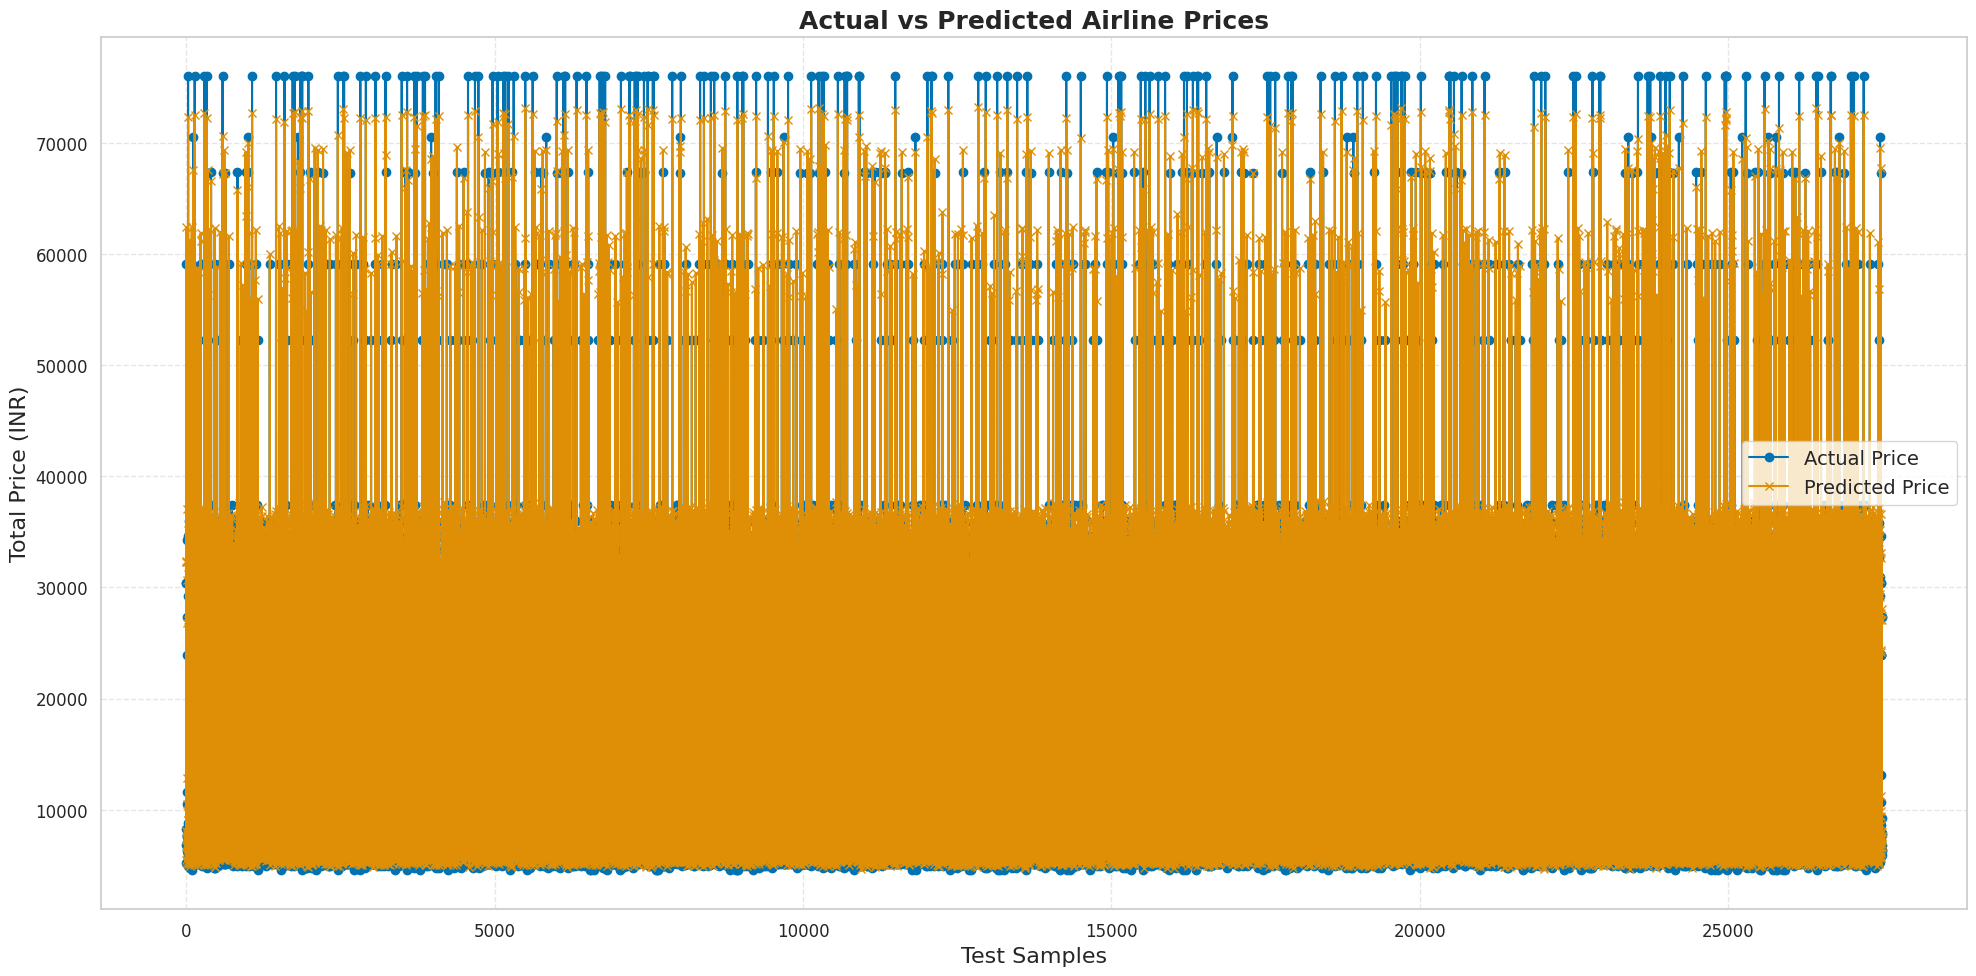

In [479]:
# Reset both to avoid index mismatch
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred.ravel())  # No index needed now

# Plot
plt.figure(figsize=(20, 10))
plt.plot(y_test, label='Actual Price', marker='o')
plt.plot(y_pred, label='Predicted Price', marker='x')
plt.legend(fontsize=14)
plt.xlabel('Test Samples', fontsize=16)
plt.ylabel('Total Price (INR)', fontsize=16)
plt.title('Actual vs Predicted Airline Prices', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


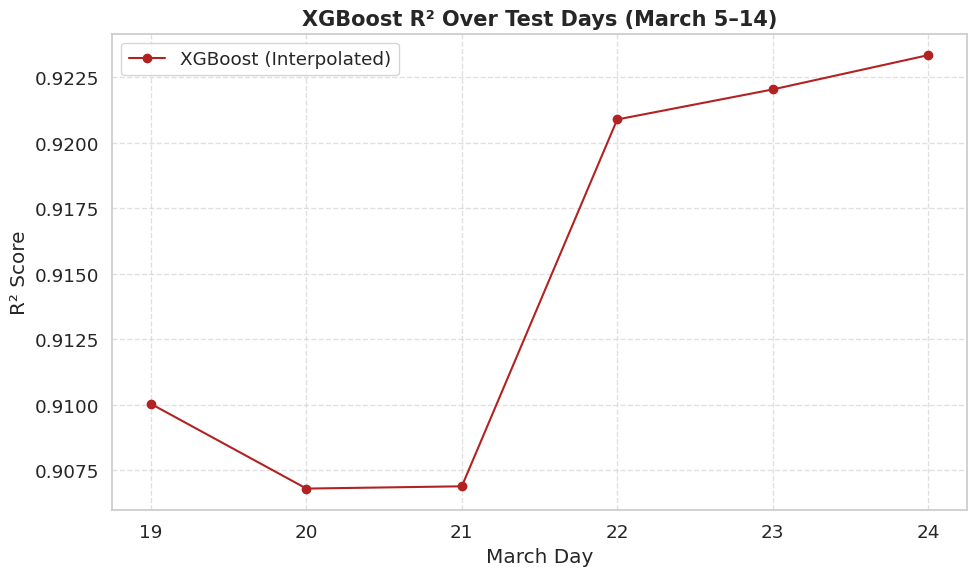

In [480]:

# Define training data: Feb 23 to March 4
train_df = df[
    ((df['Fetch Month'] == 2) & (df['Fetch Day'] >= 23)) |
    ((df['Fetch Month'] == 3) & (df['Fetch Day'] <=1))
].copy()

X_train = train_df.drop(['Total Price'], axis=1)
y_train = train_df['Total Price']

# Initialize and train XGBoost
model_test = XGBRegressor()
model_test.fit(X_train, y_train)

# Test days: March 5 to 14
test_days = list(range(19, 25))
r2_scores = []

# Evaluate model
for day in test_days:
    test_mask = (df['Fetch Month'] == 3) & (df['Fetch Day'] == day)
    test_df = df[test_mask].copy()

    if test_df.empty:
        print(f"⚠️ No data for March {day}, inserting NaN.")
        r2_scores.append(np.nan)
        continue

    X_test = test_df.drop(['Total Price'], axis=1)
    y_test = test_df['Total Price']

    try:
        y_pred = model_test.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
    except Exception as e:
        print(f"❌ Error on March {day}: {e}")
        r2_scores.append(np.nan)

# Interpolate missing values for smooth plotting
interpolated_scores = pd.Series(r2_scores, index=test_days).interpolate(method='linear')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(test_days, interpolated_scores, marker='o', color='firebrick', label='XGBoost (Interpolated)')
plt.title("XGBoost R² Over Test Days (March 5–14)", fontsize=15, fontweight='bold')
plt.xlabel("March Day")
plt.ylabel("R² Score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(test_days)
plt.legend()
plt.tight_layout()
plt.show()


In [481]:
df.head()

Flight Number  Departure Time  Flight Duration  Total Price  \
0           2993       12.583333              135         5144   
1           2420       14.916667              140         5144   
2           2112       14.166667              145         5144   
3           2933       15.333333              145         5144   
4           2957       20.500000              145         5144   

   days_until_departure  Fetch Month  Fetch Day  Departure Month  \
0                     0            4          5                4   
1                     0            4          5                4   
2                     0            4          5                4   
3                     0            4          5                4   
4                     0            4          5                4   

   Departure Day  Day of Week  ...  Airline_AI  Airline_SG  Destination_BLR  \
0              5            5  ...           1           0                0   
1              5            5  ...           1           0                0   
2              5            5  ...           1           0                0   
3              5            5  ...           1           0                0   
4              5            5  ...           1           0                0   

   Destination_BOM  Destination_CCU  Destination_MAA  Seat Class_BUSINESS  \
0                1                0                0                    0   
1                1                0                0                    0   
2                1                0                0                    0   
3                1                0                0                    0   
4                1                0                0                    0   

   Seat Class_ECONOMY  Seat Class_FIRST  Seat Class_PREMIUM_ECONOMY  
0                   1                 0                           0  
1                   1                 0                           0  
2                   1                 0                           0  
3                   1                 0                           0  
4                   1                 0                           0  

[5 rows x 22 columns]

In [482]:
results = []

# One-hot column names
destination_cols = [col for col in df.columns if col.startswith('Destination_')]
airline_cols = [col for col in df.columns if col.startswith('Airline_')]

for day in range(21, 32):  # March 12 to 22
    # Filter only ECONOMY class and fetch day
    test_df = df[
        (df['Fetch Month'] == 3) &
        (df['Fetch Day'] == day) &
        (df['Seat Class_ECONOMY'] == 1)
    ].copy()

    if test_df.empty:
        print(f"No data for March {day}")
        continue

    # Predict prices
    X_test = test_df.drop(['Total Price'], axis=1)
    test_df['Predicted Price'] = model.predict(X_test)

    # For each destination
    for dest_col in destination_cols:
        dest_df = test_df[test_df[dest_col] == 1]

        if dest_df.empty:
            continue

        # For each airline within this destination
        for airline_col in airline_cols:
            airline_dest_df = dest_df[dest_df[airline_col] == 1]
            if not airline_dest_df.empty:
                min_price = airline_dest_df['Predicted Price'].min()
                destination = dest_col.replace("Destination_", "")
                airline = airline_col.replace("Airline_", "")

                results.append({
                    'Date': f"March {day}",
                    'Destination': destination,
                    'Airline': airline,
                    'Min Predicted Price': round(min_price)
                })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by=['Destination', 'Date', 'Airline'])

# Show result
results_df.head()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
No data for March 25
No data for March 26
No data for March 27
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Date Destination Airline  Min Predicted Price
0   March 21         BLR      AI                10449
5   March 22         BLR      AI                10467
6   March 22         BLR      SG                11314
12  March 23         BLR      AI                10713
13  March 23         BLR      SG                11695

In [483]:

## -------------------------------Experiment -----------------------------


# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from xgboost import XGBRegressor
# import numpy as np
# import pandas as pd

# # Build 'Fetch Date' column from 'Fetch Month' and 'Fetch Day'
# df['Fetch Date'] = pd.to_datetime(
#     '2025-' + df['Fetch Month'].astype(str).str.zfill(2) + '-' + df['Fetch Day'].astype(str).str.zfill(2)
# )

# results_all = []

# # Repeat 4 times with 7-day step shift
# for repeat in range(4):
#     results = []

#     # Define 7-day training window
#     train_start = pd.to_datetime("2025-02-23") + pd.Timedelta(days=repeat * 7)
#     train_end = train_start + pd.Timedelta(days=6)

#     train_df = df[(df['Fetch Date'] >= train_start) & (df['Fetch Date'] <= train_end)]
#     if train_df.empty:
#         continue

#     X_train = train_df.drop(['Total Price', 'Fetch Date'], axis=1)
#     y_train = train_df['Total Price']

#     # Train the model
#     model = XGBRegressor()
#     model.fit(X_train, y_train)

#     # Test on 4 sequential 3-day windows
#     for step in range(4):
#         test_start = train_end + pd.Timedelta(days=1 + step * 3)
#         test_end = test_start + pd.Timedelta(days=2)

#         test_df = df[(df['Fetch Date'] >= test_start) & (df['Fetch Date'] <= test_end)]
#         if test_df.empty:
#             continue

#         X_test = test_df.drop(['Total Price', 'Fetch Date'], axis=1)
#         y_test = test_df['Total Price']
#         y_pred = model.predict(X_test)

#         mae = mean_absolute_error(y_test, y_pred)
#         mse = mean_squared_error(y_test, y_pred)
#         rmse = np.sqrt(mse)
#         r2 = r2_score(y_test, y_pred)

#         results_all.append({
#             'Repeat': repeat + 1,
#             'Step': step + 1,
#             'Train Start': train_start.date(),
#             'Train End': train_end.date(),
#             'Test Start': test_start.date(),
#             'Test End': test_end.date(),
#             'MAE': mae,
#             'MSE': mse,
#             'RMSE': rmse,
#             'R2 Score': r2
#         })

# # Convert to DataFrame
# results_df = pd.DataFrame(results_all)
# print(results_df)


In [484]:
new_data = [[
    2943,       # Flight Number
    7.5,        # Departure Time
    125,        # Flight Duration (Minutes)
    15,         # days_until_departure
    # 186,           # Total Seat Capacity (A320neo)
    1,          # Airline_AI
    0,          # Airline_SG
    0, 1, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 1, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 7,       # Fetch Month, Fetch Day
    4, 22,      # Departure Month, Departure Day
    1,          # Day of Week (Tuesday)
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2933,       # Flight Number
    15.5,       # Departure Time (15:30 is 15.5 hours)
    135,        # Flight Duration (Minutes)
    15,         # days_until_departure
    # 186,        # Total Seat Capacity (A320neo)
    1,          # Airline_AI (Air India)
    0,          # Airline_SG (not Singapore Airlines)
    0, 1, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 1, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 22,      # Fetch Month, Fetch Day
    4, 22,      # Departure Month, Departure Day
    1,          # Day of Week (Tuesday)
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2999,       # Flight Number
    22.0,       # Departure Time (10:00 PM)
    135,        # Flight Duration (Minutes)
    15,         # days_until_departure
     # 186,      # Total Seat Capacity (A320neo)
    1,          # Airline_AI
    0,          # Airline_SG
    0, 1, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 1, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 7,       # Fetch Month, Fetch Day
    4, 22,      # Departure Month, Departure Day
    1,          # Day of Week (Tuesday)
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2429,       # Flight Number
    7.0,        # Departure Time (07:00 AM)
    135,        # Flight Duration (Minutes)
    15,         # days_until_departure
    #186,        # Total Seat Capacity (A320neo)
    1,          # Airline_AI
    0,          # Airline_SG
    0, 1, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 1, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 7,       # Fetch Month, Fetch Day
    4, 22,      # Departure Month, Departure Day
    1,          # Day of Week (Tuesday)
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2815,       # Flight Number
    7.5,        # Departure Time (07:30 AM)
    160,        # Flight Duration (Minutes)
    15,         # days_until_departure
     #186,      # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 1, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 7,       # Fetch Month, Fetch Day
    4, 22,      # Departure Month, Departure Day
    1,          # Day of Week (Tuesday)
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2809,       # Flight Number
    20.1667,    # Departure Time (20:10 in hours)
    165,        # Flight Duration (Minutes)
    15,         # days_until_departure
   # 186,         # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 1, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 7,       # Fetch Month, Fetch Day
    4, 22,      # Departure Month, Departure Day
    1,          # Day of Week (Tuesday)
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2653,       # Flight Number
    3.5,        # Departure Time (03:30 AM)
    165,        # Flight Duration (Minutes)
    15,         # days_until_departure
    #186,        # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 1, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 7,       # Fetch Month, Fetch Day
    4, 22,      # Departure Month, Departure Day
    1,          # Day of Week (Tuesday)
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2943,       # Flight Number (extracted from AI 2943)
    7.5,        # Departure Time (07:30 → 7 + 30/60 = 7.5)
    125,        # Flight Duration (2*60 + 5 = 125 mins)
    15,         # days_until_departure (24 Apr - 09 Apr = 15)
    #186,        # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 1, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 11,       # Fetch Month, Fetch Day (assumed to be 11 Apr)
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week (Thursday → 4 if Monday=0)
    0,          # Is Weekend (Thu → not weekend)
    0.8         # Holiday Impact
],[
    2999,       # Flight Number
    22.0,       # Departure Time (10:00 PM)
    135,        # Flight Duration (2 * 60 + 15)
    15,         # days_until_departure (24 Apr - 09 Apr = 15)
    # 186,       # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 1, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 11,       # Fetch Month, Fetch Day (assumed 11 Apr)
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week (Thursday)
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2429,       # Flight Number
    7.0,        # Departure Time (07:00 AM → 7.0)
    135,        # Flight Duration (2 * 60 + 15 = 135 minutes)
    15,         # Days Until Departure (24 Apr - 09 Apr = 15)
    #186,        # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 1, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 11,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week (Thursday)
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2933,       # Flight Number
    15.5,       # Departure Time (3:30 PM → 15.5)
    135,        # Flight Duration
    15,         # Days Until Departure (24 - 09)
    # 186,       # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 1, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 11,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2977,       # Flight Number
    19.0,       # Departure Time (7:00 PM)
    135,        # Flight Duration
    15,         # Days Until Departure
      #186,      # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 1, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 11,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2421,       # Flight Number
    2.25,       # Departure Time (02:15 AM)
    145,        # Flight Duration
    15,         # Days Until Departure
    # 186,      # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 1, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week (Thursday)
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2678,       # Flight Number
    8.5,        # Departure Time (08:30 AM)
    140,        # Flight Duration
    15,         # Days Until Departure
     # 186,       # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 1, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week (Thursday)
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2441,       # Flight Number
    14.33,      # Departure Time (14:20 → 14.33)
    140,        # Flight Duration
    15,         # Days Until Departure
     # 186,       # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 1, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2951,       # Flight Number
    13.25,      # Departure Time (13:15 → 13.25)
    140,        # Flight Duration
    15,         # Days Until Departure
     #186,       # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 1, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2815,       # Flight Number
    7.5,        # Departure Time (07:30 AM)
    160,        # Flight Duration
    15,         # Days Until Departure
    # 186,       # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 1, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2815,       # Flight Number
    7.5,        # Departure Time (07:30 AM)
    160,        # Flight Duration
    15,         # Days Until Departure
    # 186,        # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2815,       # Flight Number
    7.5,        # Departure Time (07:30 AM)
    160,        # Flight Duration
    15,         # Days Until Departure
     # 186,       # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 0, 0, 1, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2801,       # Flight Number
    9.0,        # Departure Time (09:00 AM)
    170,        # Flight Duration
    15,         # Days Until Departure
    #  186,      # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 1, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2801,       # Flight Number
    9.0,        # Departure Time (09:00 AM)
    170,        # Flight Duration
    15,         # Days Until Departure
    #186,        # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2801,       # Flight Number
    9.0,        # Departure Time (09:00 AM)
    170,        # Flight Duration
    15,         # Days Until Departure
     #186,       # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 0, 0, 1, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2809,       # Flight Number
    20.17,      # Departure Time (20:10)
    170,        # Flight Duration
    15,         # Days Until Departure
    # 186,        # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 1, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2809,       # Flight Number
    20.17,      # Departure Time (20:10)
    170,        # Flight Duration
    15,         # Days Until Departure
    #186,        # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2809,       # Flight Number
    20.17,      # Departure Time (20:10)
    170,        # Flight Duration
    15,         # Days Until Departure
    # 186,       # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 0, 0, 1, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2664,       # Flight Number
    15.5,       # Departure Time (15:30)
    170,        # Flight Duration
    15,         # Days Until Departure
     # 186,      # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 1, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2664,       # Flight Number
    15.5,       # Departure Time (15:30)
    170,        # Flight Duration
    15,         # Days Until Departure
    #186,        # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2664,       # Flight Number
    15.5,       # Departure Time (15:30)
    170,        # Flight Duration
    15,         # Days Until Departure
    # 186,       # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    1, 0, 0, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 0, 0, 1, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2702,       # Flight Number
    2.0,        # Departure Time (02:00)
    135,        # Flight Duration
    15,         # Days Until Departure
    #   186,     # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 0, 1, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 1, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week (Thursday)
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2702,       # Flight Number
    2.0,        # Departure Time (02:00)
    135,        # Flight Duration
    15,         # Days Until Departure
     #186,       # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 0, 1, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 0, 0, 1, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2702,       # Flight Number
    2.0,        # Departure Time (02:00)
    135,        # Flight Duration
    15,         # Days Until Departure
    #186,       # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 0, 1, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
],[
    2727,       # Flight Number
    21.92,      # Departure Time (21:55)
    135,        # Flight Duration
    15,         # Days Until Departure
    #186,       # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 0, 1, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 1, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2727,       # Flight Number
    21.92,      # Departure Time (21:55)
    135,        # Flight Duration
    15,         # Days Until Departure
    # 186,        # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 0, 1, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 0, 0, 1, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2727,       # Flight Number
    21.92,      # Departure Time (21:55)
    135,        # Flight Duration
    15,         # Days Until Departure
      # 186,    # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 0, 1, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2403,       # Flight Number
    17.5,       # Departure Time (17:30)
    135,        # Flight Duration
    15,         # Days Until Departure
    #186,         # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 0, 1, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 1, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2403,       # Flight Number
    17.5,       # Departure Time (17:30)
    135,        # Flight Duration
    15,         # Days Until Departure
     # 186,      # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 0, 1, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    0, 0, 0, 1, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
,[
    2403,       # Flight Number
    17.5,       # Departure Time (17:30)
    135,        # Flight Duration
    15,         # Days Until Departure
      #186,     # Total Seat Capacity
    1,          # Airline_AI
    0,          # Airline_SG
    0, 0, 1, 0, # Destination_BLR, Destination_BOM, Destination_CCU, Destination_MAA
    1, 0, 0, 0, # Seat Class_BUSINESS, Seat Class_ECONOMY, Seat Class_FIRST, Seat Class_PREMIUM_ECONOMY
    4, 9,       # Fetch Month, Fetch Day
    4, 24,      # Departure Month, Departure Day
    4,          # Day of Week
    0,          # Is Weekend
    0.8         # Holiday Impact
]
]




In [485]:
#Columns in correct order
columns = [
    "Flight Number", "Departure Time", "Flight Duration",
    #'Total Seats',
    "days_until_departure",
    "Airline_AI", "Airline_SG",
    "Destination_BLR", "Destination_BOM", "Destination_CCU", "Destination_MAA",
    "Seat Class_BUSINESS", "Seat Class_ECONOMY", "Seat Class_FIRST", "Seat Class_PREMIUM_ECONOMY",
    "Fetch Month", "Fetch Day", "Departure Month", "Departure Day",
    "Day of Week", "Is Weekend", "Holiday Impact"
]

# Create DataFrame
new_df = pd.DataFrame(new_data, columns=columns)

# Save to CSV
new_df.to_csv("new_data_point.csv", index=False)

# Display first row
new_df.head()

Flight Number  Departure Time  Flight Duration  days_until_departure  \
0           2943             7.5              125                    15   
1           2933            15.5              135                    15   
2           2999            22.0              135                    15   
3           2429             7.0              135                    15   
4           2815             7.5              160                    15   

   Airline_AI  Airline_SG  Destination_BLR  Destination_BOM  Destination_CCU  \
0           1           0                0                1                0   
1           1           0                0                1                0   
2           1           0                0                1                0   
3           1           0                0                1                0   
4           1           0                1                0                0   

   Destination_MAA  ...  Seat Class_ECONOMY  Seat Class_FIRST  \
0                0  ...                   1                 0   
1                0  ...                   1                 0   
2                0  ...                   1                 0   
3                0  ...                   1                 0   
4                0  ...                   1                 0   

   Seat Class_PREMIUM_ECONOMY  Fetch Month  Fetch Day  Departure Month  \
0                           0            4          7                4   
1                           0            4         22                4   
2                           0            4          7                4   
3                           0            4          7                4   
4                           0            4          7                4   

   Departure Day  Day of Week  Is Weekend  Holiday Impact  
0             22            1           0             0.8  
1             22            1           0             0.8  
2             22            1           0             0.8  
3             22            1           0             0.8  
4             22            1           0             0.8  

[5 rows x 21 columns]

In [486]:
new_df.columns

Index(['Flight Number', 'Departure Time', 'Flight Duration',
       'days_until_departure', 'Airline_AI', 'Airline_SG', 'Destination_BLR',
       'Destination_BOM', 'Destination_CCU', 'Destination_MAA',
       'Seat Class_BUSINESS', 'Seat Class_ECONOMY', 'Seat Class_FIRST',
       'Seat Class_PREMIUM_ECONOMY', 'Fetch Month', 'Fetch Day',
       'Departure Month', 'Departure Day', 'Day of Week', 'Is Weekend',
       'Holiday Impact'],
      dtype='object')

In [487]:
X_train.columns

Index(['Flight Number', 'Departure Time', 'Flight Duration',
       'days_until_departure', 'Fetch Month', 'Fetch Day', 'Departure Month',
       'Departure Day', 'Day of Week', 'Is Weekend', 'Holiday Impact',
       'Airline_AI', 'Airline_SG', 'Destination_BLR', 'Destination_BOM',
       'Destination_CCU', 'Destination_MAA', 'Seat Class_BUSINESS',
       'Seat Class_ECONOMY', 'Seat Class_FIRST', 'Seat Class_PREMIUM_ECONOMY'],
      dtype='object')

In [488]:
y_real=[5709,5608,5706,5975,7892,8417,9099,34863,24328,26967,26967,37943,34863,34863,34863,37943,6778,34269,8672,7104,34269,8672,7892,34269,9512,8163,40586,9913,5681,6930,27090,7024,8364,29741,7283,9374,35632]

In [489]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Your trained models
models = {
    "LinearRegression": lr,
    "DecisionTree": dt,
    "RandomForest": rf,
    "GradientBoosting": gb,
    "XGBoost": xgb,
    "SVM": svm,
    "DL": model
}

# Placeholder for results
results = {}

# Loop through each model
for name, model in models.items():
    y_pred_real = model.predict(new_df)
    r2 = r2_score(y_real, y_pred_real)
    mse = mean_squared_error(y_real, y_pred_real)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred_real)

    results[name] = {
        "R2 Score": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae
    }

# Print the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  R² Score = {metrics['R2 Score']:.4f}")
    print(f"  MSE = {metrics['MSE']:.4f}")
    print(f"  RMSE = {metrics['RMSE']:.4f}")
    print(f"  MAE = {metrics['MAE']:.4f}")
    print()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
LinearRegression:
  R² Score = 0.8754
  MSE = 21075348.3402
  RMSE = 4590.7895
  MAE = 3027.0511

DecisionTree:
  R² Score = 0.8261
  MSE = 29424857.3784
  RMSE = 5424.4684
  MAE = 3423.9730

RandomForest:
  R² Score = 0.8298
  MSE = 28797759.4761
  RMSE = 5366.3544
  MAE = 3304.8749

GradientBoosting:
  R² Score = 0.8662
  MSE = 22641211.1867
  RMSE = 4758.2782
  MAE = 2939.7888

XGBoost:
  R² Score = 0.8253
  MSE = 29558452.0000
  RMSE = 5436.7685
  MAE = 3220.4529

SVM:
  R² Score = -0.6829
  MSE = 284743657.9552
  RMSE = 16874.3491
  MAE = 11559.3049

DL:
  R² Score = 0.9079
  MSE = 15590324.0000
  RMSE = 3948.4584
  MAE = 2474.6208



In [490]:
!pip install pulp

In [491]:
df.dtypes

Flight Number                   int64
Departure Time                float64
Flight Duration                 int64
Total Price                     int64
days_until_departure            int64
Fetch Month                     int32
Fetch Day                       int32
Departure Month                 int32
Departure Day                   int32
Day of Week                     int32
Is Weekend                      int64
Holiday Impact                float64
Airline_AI                      int64
Airline_SG                      int64
Destination_BLR                 int64
Destination_BOM                 int64
Destination_CCU                 int64
Destination_MAA                 int64
Seat Class_BUSINESS             int64
Seat Class_ECONOMY              int64
Seat Class_FIRST                int64
Seat Class_PREMIUM_ECONOMY      int64
dtype: object

In [492]:
df.head()

Flight Number  Departure Time  Flight Duration  Total Price  \
0           2993       12.583333              135         5144   
1           2420       14.916667              140         5144   
2           2112       14.166667              145         5144   
3           2933       15.333333              145         5144   
4           2957       20.500000              145         5144   

   days_until_departure  Fetch Month  Fetch Day  Departure Month  \
0                     0            4          5                4   
1                     0            4          5                4   
2                     0            4          5                4   
3                     0            4          5                4   
4                     0            4          5                4   

   Departure Day  Day of Week  ...  Airline_AI  Airline_SG  Destination_BLR  \
0              5            5  ...           1           0                0   
1              5            5  ...           1           0                0   
2              5            5  ...           1           0                0   
3              5            5  ...           1           0                0   
4              5            5  ...           1           0                0   

   Destination_BOM  Destination_CCU  Destination_MAA  Seat Class_BUSINESS  \
0                1                0                0                    0   
1                1                0                0                    0   
2                1                0                0                    0   
3                1                0                0                    0   
4                1                0                0                    0   

   Seat Class_ECONOMY  Seat Class_FIRST  Seat Class_PREMIUM_ECONOMY  
0                   1                 0                           0  
1                   1                 0                           0  
2                   1                 0                           0  
3                   1                 0                           0  
4                   1                 0                           0  

[5 rows x 22 columns]

In [493]:
df.shape

(34365, 22)

In [494]:
import pandas as pd
from tqdm import tqdm

def generate_test_data_combinations(
    reference_row,
    booking_range,
    departure_range,
    airlines,
    destinations,
    seat_classes,
    holiday_impact=0.8
):
    """
    Generate test data with all combinations of booking dates, departure dates,
    airlines, destinations, and seat classes based on a reference row.

    Parameters:
    - reference_row: pd.Series - template row with all features
    - booking_range: pd.DatetimeIndex or list of pd.Timestamp - booking dates
    - departure_range: pd.DatetimeIndex or list of pd.Timestamp - departure dates
    - airlines: list of str, e.g. ['AI', 'SG']
    - destinations: list of str, e.g. ['BLR', 'BOM', 'MAA', 'CCU']
    - seat_classes: list of str, e.g. ['ECONOMY', 'PREMIUM_ECONOMY', 'BUSINESS', 'FIRST']
    - holiday_impact: float, default 0.8

    Returns:
    - pd.DataFrame with all test rows (without 'Total Price')
    """

    rows = []

    # Dynamically prepare the one-hot column names
    airline_cols = [f'Airline_{a}' for a in airlines]
    destination_cols = [f'Destination_{d}' for d in destinations]
    seat_class_cols = [f'Seat Class_{s}' for s in seat_classes]

    for b_date in tqdm(booking_range, desc="Booking Dates"):
        for d_date in departure_range:
            if d_date >= b_date:  # Valid departure date

                days_until_departure = (d_date - b_date).days
                fetch_month = b_date.month
                fetch_day = b_date.day
                departure_month = d_date.month
                departure_day = d_date.day
                day_of_week = d_date.weekday()
                is_weekend = 1 if day_of_week >= 5 else 0

                for airline in airlines:
                    for destination in destinations:
                        for seat_class in seat_classes:
                            new_row = reference_row.copy()

                            # Update date/time features
                            new_row['days_until_departure'] = days_until_departure
                            new_row['Fetch Month'] = fetch_month
                            new_row['Fetch Day'] = fetch_day
                            new_row['Departure Month'] = departure_month
                            new_row['Departure Day'] = departure_day
                            new_row['Day of Week'] = day_of_week
                            new_row['Is Weekend'] = is_weekend
                            new_row['Holiday Impact'] = holiday_impact

                            # Reset all one-hot columns
                            new_row[airline_cols] = 0
                            new_row[destination_cols] = 0
                            new_row[seat_class_cols] = 0

                            # Set current ones to 1
                            airline_col = f'Airline_{airline}'
                            destination_col = f'Destination_{destination}'
                            seat_class_col = f'Seat Class_{seat_class}'

                            if airline_col in new_row.index:
                                new_row[airline_col] = 1
                            if destination_col in new_row.index:
                                new_row[destination_col] = 1
                            if seat_class_col in new_row.index:
                                new_row[seat_class_col] = 1

                            # Drop Total Price if present
                            if 'Total Price' in new_row.index:
                                new_row = new_row.drop('Total Price')

                            rows.append(new_row)

    return pd.DataFrame(rows)


In [495]:
# Assuming you have a reference_row (one row from your train/test data without Total Price)
reference_row = df.iloc[0]

booking_range = pd.date_range("2025-05-01", "2025-05-06")
departure_range = pd.date_range("2025-05-10", "2025-05-15")
airlines = ['AI', 'SG']
destinations = ['BLR', 'BOM', 'MAA', 'CCU']
seat_classes = ['ECONOMY', 'PREMIUM_ECONOMY', 'BUSINESS', 'FIRST']

df_test = generate_test_data_combinations(reference_row, booking_range, departure_range, airlines, destinations, seat_classes)
print(df_test.shape)


Booking Dates: 100%|██████████| 6/6 [00:01<00:00,  4.15it/s]

(1152, 21)


In [496]:
# Features used for prediction - same as your training features except 'Total Price'
# For example, if your training columns were:
feature_columns = [
    'Flight Number', 'Departure Time', 'Flight Duration', 'days_until_departure',
    'Fetch Month', 'Fetch Day', 'Departure Month', 'Departure Day', 'Day of Week',
    'Is Weekend', 'Holiday Impact',
    'Airline_AI', 'Airline_SG',
    'Destination_BLR', 'Destination_BOM', 'Destination_CCU', 'Destination_MAA',
    'Seat Class_BUSINESS', 'Seat Class_ECONOMY', 'Seat Class_FIRST', 'Seat Class_PREMIUM_ECONOMY'
]
results_df = df_test[feature_columns]


In [497]:
model_features = xgb.get_booster().feature_names
print(model_features)


['Flight Number', 'Departure Time', 'Flight Duration', 'days_until_departure', 'Airline_AI', 'Airline_SG', 'Destination_BLR', 'Destination_BOM', 'Destination_CCU', 'Destination_MAA', 'Seat Class_BUSINESS', 'Seat Class_ECONOMY', 'Seat Class_FIRST', 'Seat Class_PREMIUM_ECONOMY', 'Fetch Month', 'Fetch Day', 'Departure Month', 'Departure Day', 'Day of Week', 'Is Weekend', 'Holiday Impact']


In [498]:
results_df = results_df[model_features]


In [499]:
# Predict prices
predicted_prices = xgb.predict(results_df)

# Add predicted prices as a new column to df_test
results_df['Predicted Price'] = predicted_prices


In [500]:
import pandas as pd

# 1. Add readable 'Airline' column
airline_cols = [col for col in results_df.columns if col.startswith('Airline_')]
results_df['Airline'] = results_df[airline_cols].idxmax(axis=1).str.replace('Airline_', '')

# 2. Add readable 'Destination' column
dest_cols = [col for col in results_df.columns if col.startswith('Destination_')]
results_df['Destination'] = results_df[dest_cols].idxmax(axis=1).str.replace('Destination_', '')

# 3. Add readable 'Seat Class' column
seat_class_cols = [col for col in results_df.columns if col.startswith('Seat Class_')]
results_df['Seat Class'] = results_df[seat_class_cols].idxmax(axis=1).str.replace('Seat Class_', '')


In [501]:
def greedy_ticket_selector(results_df, budget, requirements):
    fulfilled_requirements = []
    unfulfilled_requirements = []
    purchased_tickets = []
    total_spend = 0
    remaining_budget = budget

    # Case 1: Requirements provided
    if requirements:
        for req in requirements:
            dest = req['Destination']
            seat_class = req['Seat Class']
            required = req['Tickets']
            airline = req.get('Airline')

            matches = results_df[
                (results_df['Destination'] == dest) &
                (results_df['Seat Class'] == seat_class)
            ]
            if airline:
                matches = matches[matches['Airline'] == airline]

            matches = matches.sort_values(by='Predicted Price')

            booked = 0
            for _, row in matches.iterrows():
                price = row['Predicted Price']
                if remaining_budget >= price and booked < required:
                    purchased_tickets.append({
                        'Airline': row['Airline'],
                        'Destination': dest,
                        'Seat Class': seat_class,
                        'Tickets': 1,
                        'Total': price
                    })
                    remaining_budget -= price
                    total_spend += price
                    booked += 1
                if booked == required:
                    break

            if booked > 0:
                fulfilled_requirements.append({
                    'Destination': dest,
                    'Seat Class': seat_class,
                    'Tickets': booked,
                    'Airline': airline if airline else 'Any'
                })

            if booked < required:
                remaining = required - booked
                approx_price = None
                if booked < len(matches):
                    approx_price = matches.iloc[booked]['Predicted Price']
                elif not matches.empty:
                    approx_price = matches.iloc[-1]['Predicted Price']
                if approx_price is not None:
                    approx_extra_needed = approx_price * remaining
                    unfulfilled_requirements.append({
                        'Destination': dest,
                        'Seat Class': seat_class,
                        'unfulfilled': remaining,
                        'approx_extra_needed': approx_extra_needed,
                        'Airline': airline if airline else 'Any'
                    })

    # Case 2: No requirements — greedy cheapest-first purchase
    else:
        sorted_df = results_df.sort_values(by='Predicted Price')
        for _, row in sorted_df.iterrows():
            price = row['Predicted Price']
            if remaining_budget >= price:
                purchased_tickets.append({
                    'Airline': row['Airline'],
                    'Destination': row['Destination'],
                    'Seat Class': row['Seat Class'],
                    'Tickets': 1,
                    'Total': price
                })
                remaining_budget -= price
                total_spend += price
            else:
                break

    return {
        'fulfilled_requirements': fulfilled_requirements,
        'unfulfilled_requirements': unfulfilled_requirements,
        'purchased_tickets': purchased_tickets,
        'total_spend': round(total_spend, 2),
        'remaining_budget': round(remaining_budget, 2)
    }


In [502]:
results_df.columns

Index(['Flight Number', 'Departure Time', 'Flight Duration',
       'days_until_departure', 'Airline_AI', 'Airline_SG', 'Destination_BLR',
       'Destination_BOM', 'Destination_CCU', 'Destination_MAA',
       'Seat Class_BUSINESS', 'Seat Class_ECONOMY', 'Seat Class_FIRST',
       'Seat Class_PREMIUM_ECONOMY', 'Fetch Month', 'Fetch Day',
       'Departure Month', 'Departure Day', 'Day of Week', 'Is Weekend',
       'Holiday Impact', 'Predicted Price', 'Airline', 'Destination',
       'Seat Class'],
      dtype='object')

In [503]:

requirements = [
    {'Destination': 'BOM', 'Seat Class': 'BUSINESS', 'Airline': 'AI', 'Tickets': 1},
    {'Destination': 'BLR', 'Seat Class': 'ECONOMY', 'Airline': 'SG', 'Tickets': 2},
    {'Destination': 'CCU', 'Seat Class': 'ECONOMY', 'Airline': 'SG', 'Tickets': 2}
]

results = greedy_ticket_selector(results_df, budget=47300, requirements=requirements)

print(" FLIGHT BOOKING SUMMARY\n")

print("Budget Overview")
print("─────────────────────────────")
print(f"Total Tickets Booked   : {sum(t['Tickets'] for t in results['purchased_tickets'])}")
print(f"Total Amount Spent     : ₹{results['total_spend']:.2f}")
print(f" Remaining Budget        : ₹{results['remaining_budget']:.2f}")
print()

# Fulfilled
print("Fulfilled Requirements")
print("─────────────────────────────")
if results['fulfilled_requirements']:
    for f in results['fulfilled_requirements']:
        print(f"{f['Tickets']}x {f['Destination']} ({f['Seat Class']}) on {f['Airline']}")
else:
    print("None")

# Purchased Tickets
print("\n Purchased Tickets")
print("─────────────────────────────")
if results['purchased_tickets']:
    for t in results['purchased_tickets']:
        print(f" {t['Tickets']}x {t['Airline']} to {t['Destination']} in {t['Seat Class']} → ₹{t['Total']:.2f}")
else:
    print(" No tickets were booked.")

# Unfulfilled
total_extra_needed = 0
if results['unfulfilled_requirements']:
    print("\n Unfulfilled Requirements")
    print("─────────────────────────────")
    for req in results['unfulfilled_requirements']:
        extra = req['approx_extra_needed'] - results['remaining_budget']
        total_extra_needed += req['approx_extra_needed']
        print(f" {req['unfulfilled']}x {req['Destination']} ({req['Seat Class']}) on {req['Airline']}")
        print(f"   ⤷ Ticket Cost         : ₹{req['approx_extra_needed']:.2f}")
        print(f"   ⤷ Extra Budget Needed : ₹{extra:.2f}\n")

#  Total extra budget needed
if total_extra_needed > 0:
    print("Total Extra Budget Needed to Fulfill All Requirements")
    print("─────────────────────────────")
    print(" ₹{:.2f}".format(total_extra_needed - results['remaining_budget']))


 FLIGHT BOOKING SUMMARY

Budget Overview
─────────────────────────────
Total Tickets Booked   : 5
Total Amount Spent     : ₹42421.90
 Remaining Budget        : ₹4878.10

Fulfilled Requirements
─────────────────────────────
1x BOM (BUSINESS) on AI
2x BLR (ECONOMY) on SG
2x CCU (ECONOMY) on SG

 Purchased Tickets
─────────────────────────────
 1x AI to BOM in BUSINESS → ₹22600.25
 1x SG to BLR in ECONOMY → ₹5288.24
 1x SG to BLR in ECONOMY → ₹5317.14
 1x SG to CCU in ECONOMY → ₹4593.68
 1x SG to CCU in ECONOMY → ₹4622.58


In [504]:
results_df.shape

(1152, 25)

In [505]:
def allocate_by_destination(n, results_df):
    # Step 1: Count flights per destination
    dest_counts = results_df.groupby('Destination').size().reset_index(name='Flight Count')
    total_count = dest_counts['Flight Count'].sum()

    allocations = []

    for _, row in dest_counts.iterrows():
        destination = row['Destination']
        count = row['Flight Count']
        proportion = count / total_count
        tickets_required = round(n * proportion)

        # Step 2: Filter and pick cheapest flights
        dest_df = results_df[results_df['Destination'] == destination].sort_values(by='Predicted Price')
        selected = dest_df.head(tickets_required)
        allocations.append(selected)

    # Step 3: Combine and compute total cost
    final_selection = pd.concat(allocations)
    total_cost = final_selection['Predicted Price'].sum()

    return final_selection.reset_index(drop=True), total_cost


In [506]:
n=100
selected_flights, estimated_budget = allocate_by_destination(n, results_df)
print(f"Estimated Budget for {n} tickets: ₹{estimated_budget}")
selected_flights.head()


Estimated Budget for 100 tickets: ₹502735.09375


Flight Number  Departure Time  Flight Duration  days_until_departure  \
0         2993.0       12.583333            135.0                  10.0   
1         2993.0       12.583333            135.0                   9.0   
2         2993.0       12.583333            135.0                  11.0   
3         2993.0       12.583333            135.0                   7.0   
4         2993.0       12.583333            135.0                   9.0   

   Airline_AI  Airline_SG  Destination_BLR  Destination_BOM  Destination_CCU  \
0         0.0         1.0              1.0              0.0              0.0   
1         0.0         1.0              1.0              0.0              0.0   
2         0.0         1.0              1.0              0.0              0.0   
3         0.0         1.0              1.0              0.0              0.0   
4         0.0         1.0              1.0              0.0              0.0   

   Destination_MAA  ...  Fetch Day  Departure Month  Departure Day  \
0              0.0  ...        2.0              5.0           12.0   
1              0.0  ...        3.0              5.0           12.0   
2              0.0  ...        3.0              5.0           14.0   
3              0.0  ...        5.0              5.0           12.0   
4              0.0  ...        5.0              5.0           14.0   

   Day of Week  Is Weekend  Holiday Impact  Predicted Price  Airline  \
0          0.0         0.0             0.8      5288.242676       SG   
1          0.0         0.0             0.8      5317.138184       SG   
2          2.0         0.0             0.8      5353.838379       SG   
3          0.0         0.0             0.8      5356.698242       SG   
4          2.0         0.0             0.8      5365.817871       SG   

   Destination  Seat Class  
0          BLR     ECONOMY  
1          BLR     ECONOMY  
2          BLR     ECONOMY  
3          BLR     ECONOMY  
4          BLR     ECONOMY  

[5 rows x 25 columns]

In [507]:
important_columns = ['Airline', 'Destination', 'Seat Class', 'Predicted Price',
 'Departure Time', 'days_until_departure']

# Display top 5 selected flights with only important columns
print(f"Estimated Budget for {n} tickets: ₹{estimated_budget}")
display(selected_flights[important_columns].sample(5))


Estimated Budget for 100 tickets: ₹502735.09375


Airline Destination Seat Class  Predicted Price  Departure Time  \
80      SG         MAA    ECONOMY      5216.151855       12.583333   
72      SG         CCU    ECONOMY      4902.105957       12.583333   
24      SG         BLR    ECONOMY      5665.739258       12.583333   
38      SG         BOM    ECONOMY      4594.511230       12.583333   
30      SG         BOM    ECONOMY      4494.195312       12.583333   

    days_until_departure  
80                   9.0  
72                   8.0  
24                   5.0  
38                  10.0  
30                  11.0